# 1. Data preprocessing

Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009

https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

### Read data

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

### Print out column names

In [16]:
list(df)[:10]

['Bankrupt?',
 'ROA(C) before interest and depreciation before interest',
 'ROA(A) before interest and % after tax',
 'ROA(B) before interest and depreciation after tax',
 'Operating Gross Margin',
 'Realized Sales Gross Margin',
 'Operating Profit Rate',
 'Pre-tax net Interest Rate',
 'After-tax net Interest Rate',
 'Non-industry income and expenditure/revenue']

In [8]:
# get rid of blank chars in the begining of column strings
df.rename(columns=lambda x: x.strip(), inplace=True)

In [9]:
col_names = list(df)

In [10]:
col_names[:10]

['Bankrupt?',
 'ROA(C) before interest and depreciation before interest',
 'ROA(A) before interest and % after tax',
 'ROA(B) before interest and depreciation after tax',
 'Operating Gross Margin',
 'Realized Sales Gross Margin',
 'Operating Profit Rate',
 'Pre-tax net Interest Rate',
 'After-tax net Interest Rate',
 'Non-industry income and expenditure/revenue']

### Normalize data

In [11]:
from sklearn.preprocessing import Normalizer

In [12]:
arr = df.iloc[:,1:].to_numpy()  # bez kolumny "Bankrupt?"

# sklearn.preprocessing.Normalizer działa na wierszach, dlatego transponujemy arr
arr = np.swapaxes(arr, 0, 1)
normalizer = Normalizer().fit(arr)

arr_norm = normalizer.transform(arr)
arr_norm = np.swapaxes(arr_norm, 0, 1)

data_norm = pd.DataFrame(arr_norm, columns=col_names[1:])
data_norm.insert(0, "Bankrupt?", df.iloc[:,0])

In [13]:
data_norm.iloc[:,:20]

Bankrupt?  ROA(C) before interest and depreciation before interest  \
0             1                                           0.008820         
1             1                                           0.011050         
2             1                                           0.010141         
3             1                                           0.009516         
4             1                                           0.011068         
...         ...                                                ...         
6814          0                                           0.011750         
6815          0                                           0.011309         
6816          0                                           0.011251         
6817          0                                           0.012049         
6818          0                                           0.011735         

      ROA(A) before interest and % after tax  \
0                                   0.009137   
1                                   0.011588   
2                                   0.010744   
3                                   0.009716   
4                                   0.011592   
...                                      ...   
6814                                0.011615   
6815                                0.011589   
6816                                0.011492   
6817                                0.012055   
6818                                0.012274   

      ROA(B) before interest and depreciation after tax  \
0                                              0.008821   
1                                              0.011234   
2                                              0.010268   
3                                              0.009952   
4                                              0.011355   
...                                                 ...   
6814                                           0.011810   
6815                                           0.011396   
6816                                           0.011319   
6817                                           0.012046   
6818                                           0.011948   

      Operating Gross Margin  Realized Sales Gross Margin  \
0                   0.011976                     0.011976   
1                   0.012151                     0.012151   
2                   0.011976                     0.011974   
3                   0.011619                     0.011620   
4                   0.011923                     0.011923   
...                      ...                          ...   
6814                0.012036                     0.012036   
6815                0.011913                     0.011914   
6816                0.012155                     0.012151   
6817                0.012103                     0.012104   
6818                0.012493                     0.012493   

      Operating Profit Rate  Pre-tax net Interest Rate  \
0                  0.012111                   0.012104   
1                  0.012111                   0.012111   
2                  0.012110                   0.012096   
3                  0.012108                   0.012105   
4                  0.012111                   0.012111   
...                     ...                        ...   
6814               0.012112                   0.012112   
6815               0.012112                   0.012112   
6816               0.012112                   0.012112   
6817               0.012113                   0.012113   
6818               0.012101                   0.012181   

      After-tax net Interest Rate  \
0                        0.012104   
1                        0.012111   
2                        0.012098   
3                        0.012106   
4                        0.012111   
...                           ...   
6814                     0.012112   
6815                     0.012112   
6816                     0.012112   
6817   

## Findings from normalizing data

Some attributes (Operating Expense Rate, Interest-bearing debt interest rate) contain extreamly small values (1e-14 or less), which is impossible if we normalize financial indicators oscillating between 0 and 1. Supposingly, this is the reason of puting the absolute values instead of financial indicators (eg. in Operating Expense Rate column the absolute value of Expenses were given for some companies).

Because there are even 23 such columns, removing all rows with an absolute value found in at least one column means ended up with around 300 observations from non-bankrupt class - we would have no companies to classify.

Therefore removing those columns is more reasonable approach.

## Clean the data

In [18]:
suspicious_cols = ['Operating Expense Rate',
                   'Research and development expense rate',
                   'Interest-bearing debt interest rate',
                   'Revenue Per Share (Yuan ¥)',
                   'Net Value Growth Rate',
                   'Current Ratio',
                   'Quick Ratio',
                   'Total debt/Total net worth',
                   'Accounts Receivable Turnover',
                   'Average Collection Days',
                   'Inventory Turnover Rate (times)',
                   'Fixed Assets Turnover Frequency',
                   'Revenue per person',
                   'Allocation rate per person',
                   'Quick Assets/Current Liability',
                   'Cash/Current Liability',
                   'Inventory/Current Liability',
                   'Long-term Liability to Current Assets',
                   'Current Asset Turnover Rate',
                   'Quick Asset Turnover Rate',
                   'Cash Turnover Rate',
                   'Fixed Assets to Assets',
                   'Total assets to GNP price'
                  ]
print("The number of suspicious columns: ", len(suspicious_cols))

The number of suspicious columns:  23


In [19]:
names_subset = set(list(df)).difference(set(suspicious_cols))
names_subset.remove('Total Asset Growth Rate')  # the majority of observations have absolute values
names_subset.remove('Net Income Flag')  # all observations have vlaue=1

Now we have to make sure that there are no absolute values left in dataset.

If some of them still present, try to remove rows.

For this purpose we make a dataframe of boolean values. The is going to be True if the financial indicator <= 1 or False elsewere.

In [20]:
df_bool = df[list(names_subset)] <= 1
df_bool

Current Assets/Total Assets  No-credit Interval  CFO to Assets  \
0                            True                True           True   
1                            True                True           True   
2                            True                True           True   
3                            True                True           True   
4                            True                True           True   
...                           ...                 ...            ...   
6814                         True                True           True   
6815                         True                True           True   
6816                         True                True           True   
6817                         True                True           True   
6818                         True                True           True   

      Contingent liabilities/Net worth  \
0                                 True   
1                                 True   
2                                 True   
3                                 True   
4                                 True   
...                                ...   
6814                              True   
6815                              True   
6816                              True   
6817                              True   
6818                              True   

      Interest Coverage Ratio (Interest expense to EBIT)  \
0                                                  True    
1                                                  True    
2                                                  True    
3                                                  True    
4                                                  True    
...                                                 ...    
6814                                               True    
6815                                               True    
6816                                               True    
6817                                               True    
6818                                               True    

      Operating Profit Per Share (Yuan ¥)  Equity to Long-term Liability  \
0                                    True                           True   
1                                    True                           True   
2                                    True                           True   
3                                    True                           True   
4                                    True                           True   
...                                   ...                            ...   
6814                                 True                           True   
6815                                 True                           True   
6816                                 True                           True   
6817                                 True                           True   
6818                                 True                           True   

      Cash Reinvestment %  Debt ratio %  Working Capital to Total Assets  ...  \
0                    True          True                             True  ...   
1                    True          True                             True  ...   
2                    True          True                             True  ...   
3                    True          True                             True  ...   
4                    True          True                             True  ...   
...                   ...           ...                              ...  ...   
6814                 True          True                             True  ...   
6815                 True          True                             True  ...   
6816                 True          True                             True  ...   
6817                 True          True                             True  ...   
6818                 True          True                             True  ...   

      Net Income to Total Ass

Next, we leave only rows for which all attributes are in [0, 1] range.

In [24]:
df_clean = df[list(names_subset)][df_bool.all(axis=1)]
df_clean  # data without normailizng

Current Assets/Total Assets  No-credit Interval  CFO to Assets  \
0                        0.190643            0.622879       0.520382   
1                        0.182419            0.623652       0.567101   
2                        0.602806            0.623841       0.538491   
3                        0.225815            0.622929       0.604105   
4                        0.358380            0.623521       0.578469   
...                           ...                 ...            ...   
6814                     0.578455            0.623620       0.587178   
6815                     0.444043            0.623931       0.569498   
6816                     0.496053            0.624156       0.589341   
6817                     0.564439            0.623957       0.678338   
6818                     0.505010            0.626680       0.505531   

      Contingent liabilities/Net worth  \
0                             0.006479   
1                             0.005835   
2                             0.006562   
3                             0.005366   
4                             0.006624   
...                                ...   
6814                          0.005366   
6815                          0.008619   
6816                          0.005366   
6817                          0.007068   
6818                          0.006368   

      Interest Coverage Ratio (Interest expense to EBIT)  \
0                                              0.564050    
1                                              0.570175    
2                                              0.563706    
3                                              0.564663    
4                                              0.575617    
...                                                 ...    
6814                                           0.566193    
6815                                           0.566018    
6816                                           0.565158    
6817                                           0.565302    
6818                                           0.565167    

      Operating Profit Per Share (Yuan ¥)  Equity to Long-term Liability  \
0                                0.095921                       0.126549   
1                                0.093722                       0.120916   
2                                0.092338                       0.117922   
3                                0.077762                       0.120760   
4                                0.096898                       0.110933   
...                                   ...                            ...   
6814                             0.098200                       0.112622   
6815                             0.098608                       0.112329   
6816                             0.100073                       0.110933   
6817                             0.111799                       0.110957   
6818                             0.092501                       0.110933   

      Cash Reinvestment %  Debt ratio %  Working Capital to Total Assets  ...  \
0                0.363725      0.207576                         0.672775  ...   
1                0.376709      0.171176                         0.751111  ...   
2                0.368913      0.207516                         0.829502  ...   
3                0.384077      0.151465                         0.725754  ...   
4                0.379690      0.106509                         0.751822  ...   
...                   ...           ...                              ...  ...   
6814             0.380155      0.124618                         0.817769  ...   
6815             0.377389      0.099253                         0.793387  ...   
6816             0.379392      0.038939                         0.866047  ...   
6817             0.401028      0.086979                         0.832340  ...   
6818             0.360102      0.014149                         0.873759  ...   

      Net Income to Total Ass

## Feature Selection

We also suppose that a few attributes may be higly correlated, so they give no additional value for classification algorithms.

What do we want is to find correlated subsets of attributes and leave only one from each subset.

The heatmap can be realy useful in this task.

### 1. Heatmap

In [25]:
columns_without_bankrupt = list(names_subset)
columns_without_bankrupt.remove('Bankrupt?')

<AxesSubplot:>

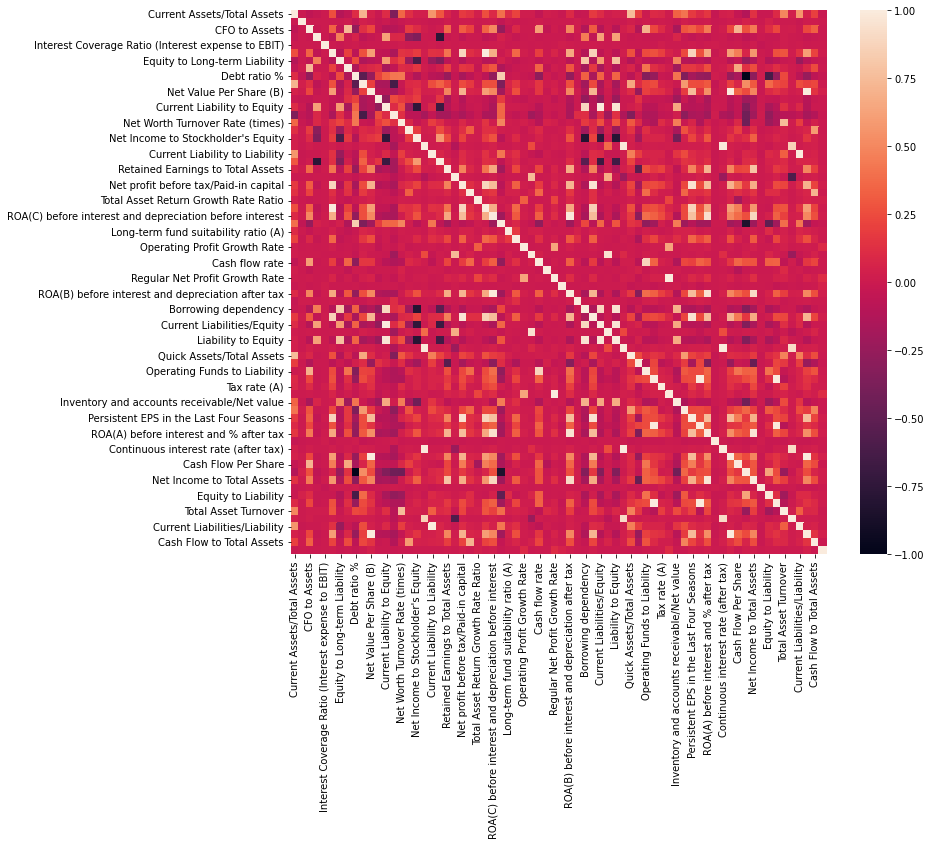

In [26]:
df_without_bankrupt = df_clean[columns_without_bankrupt]
df_corr = df_without_bankrupt.corr()
f, axes = plt.subplots(1, figsize=(12,10))
sn.heatmap(df_corr)

### Going through (10 x 10) subcubes of above heatmap for more readability

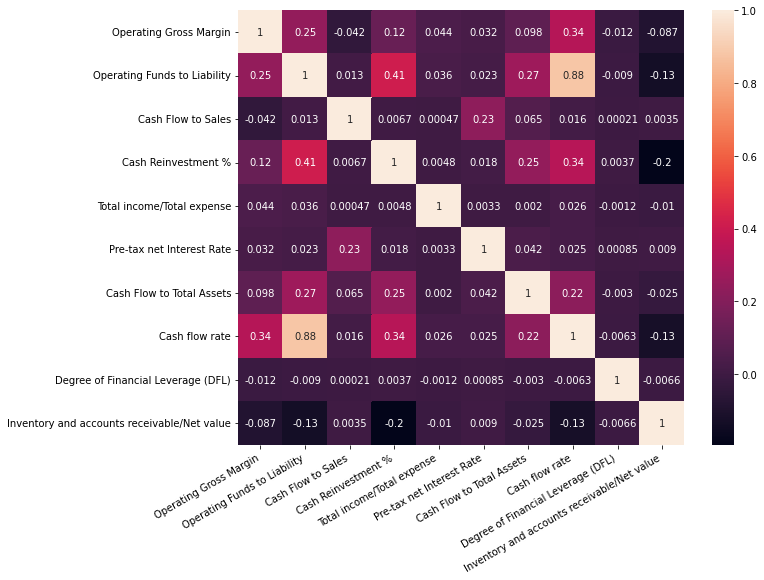

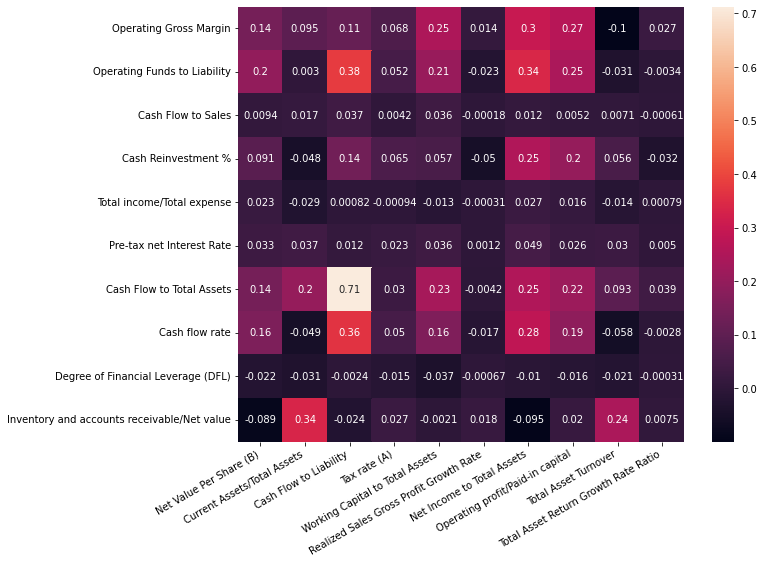

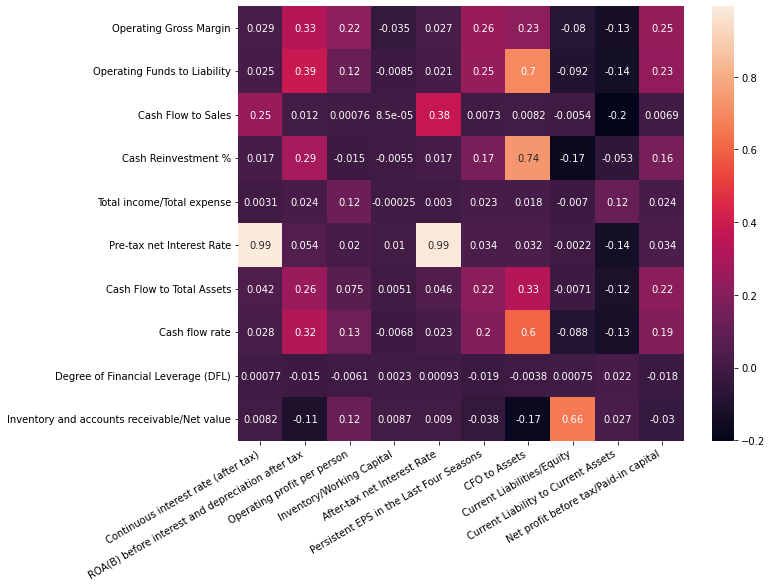

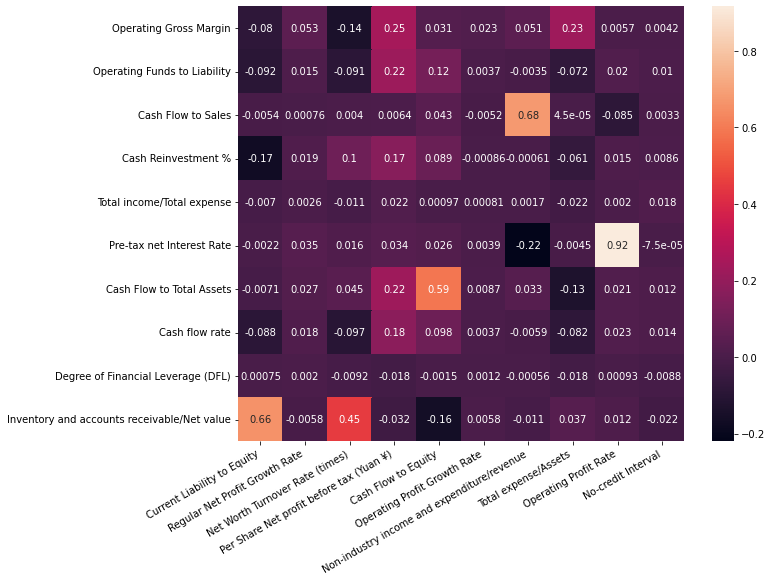

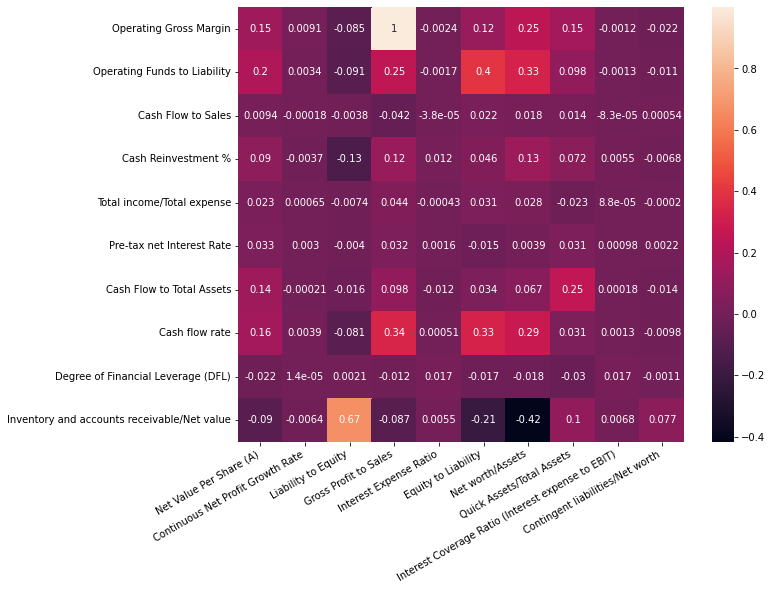

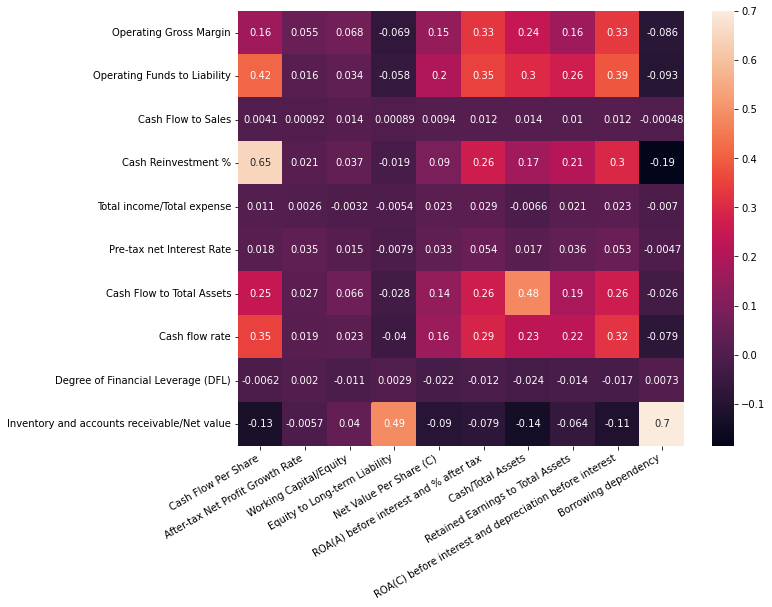

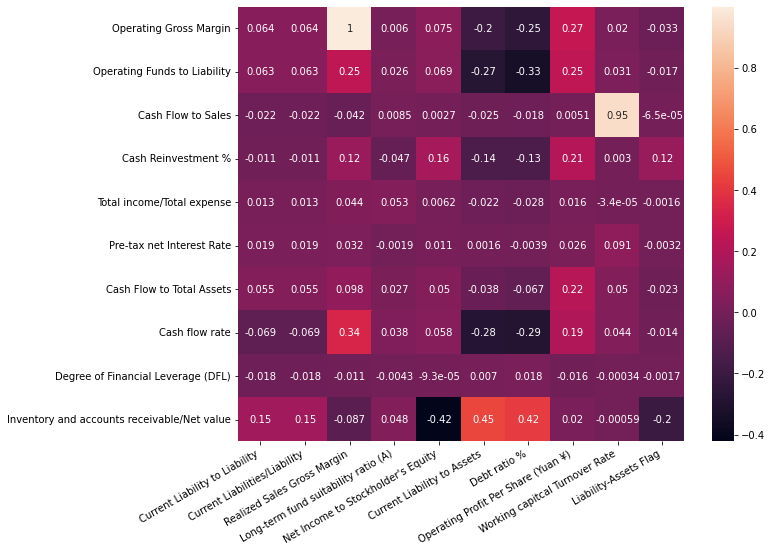

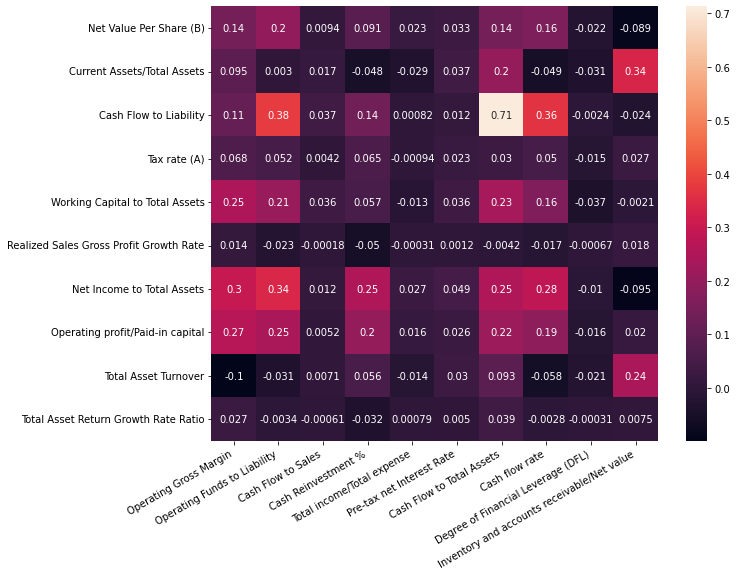

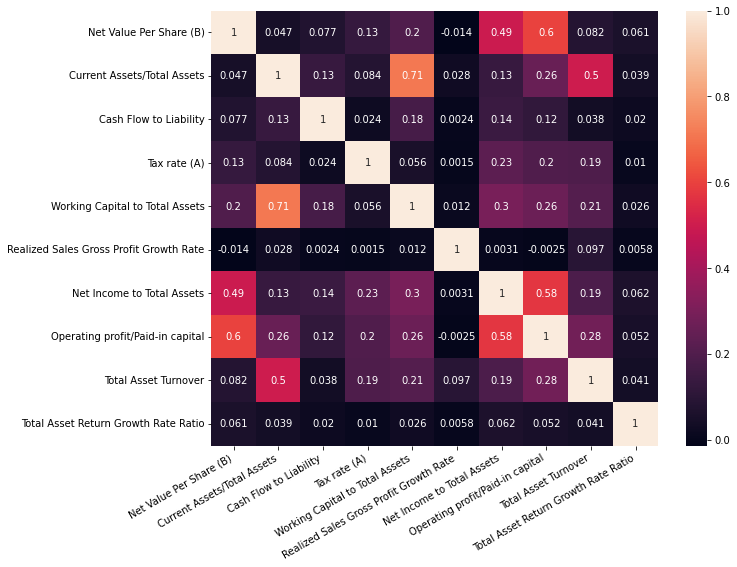

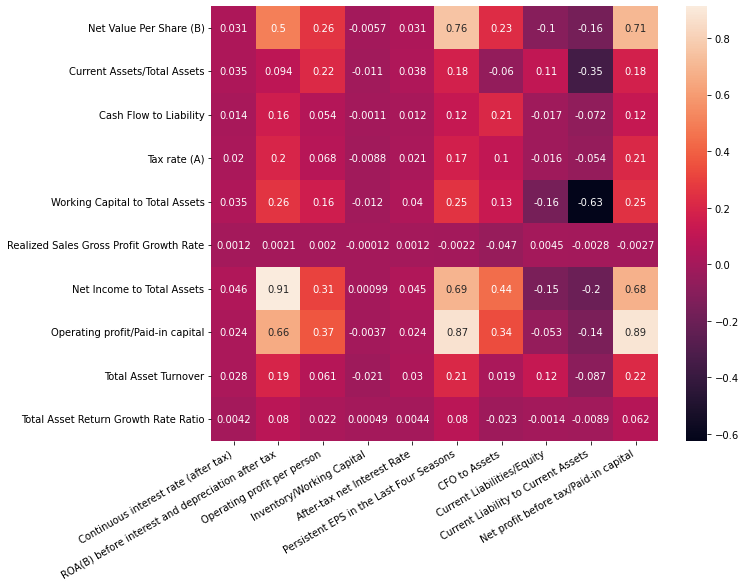

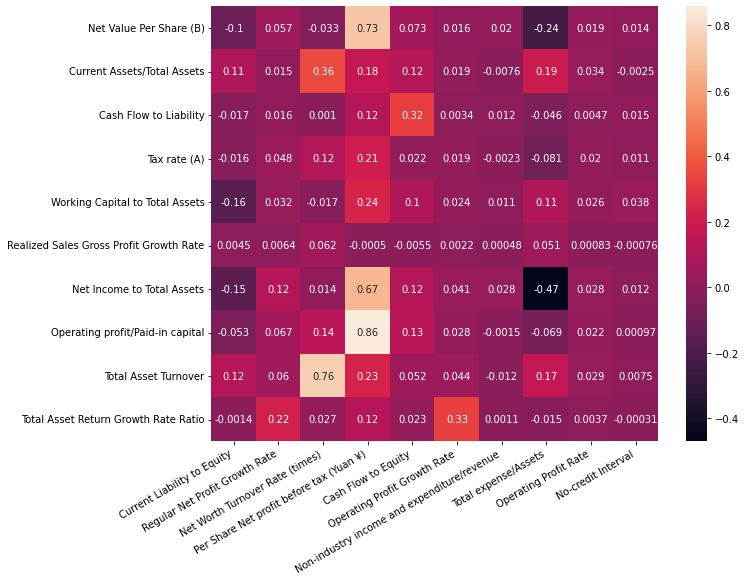

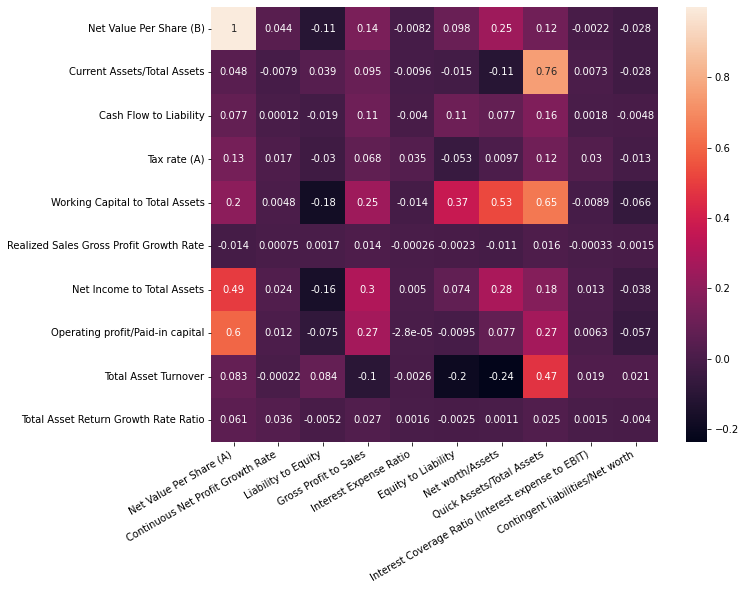

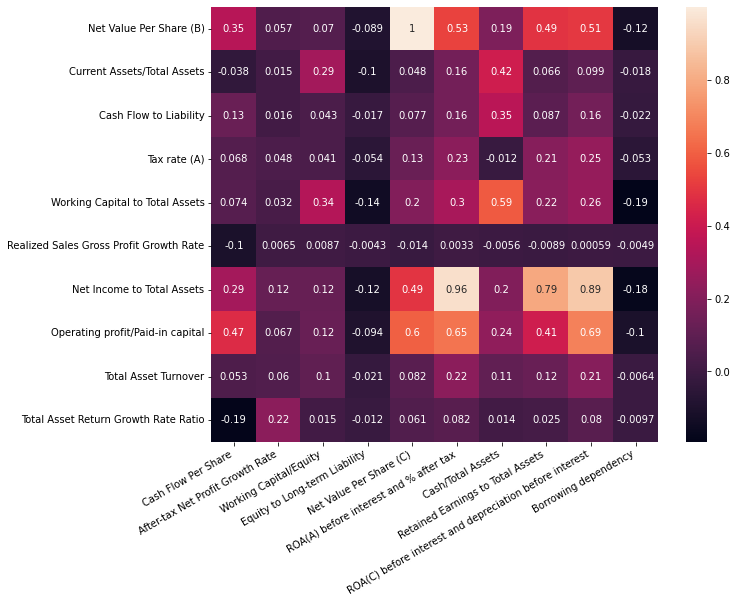

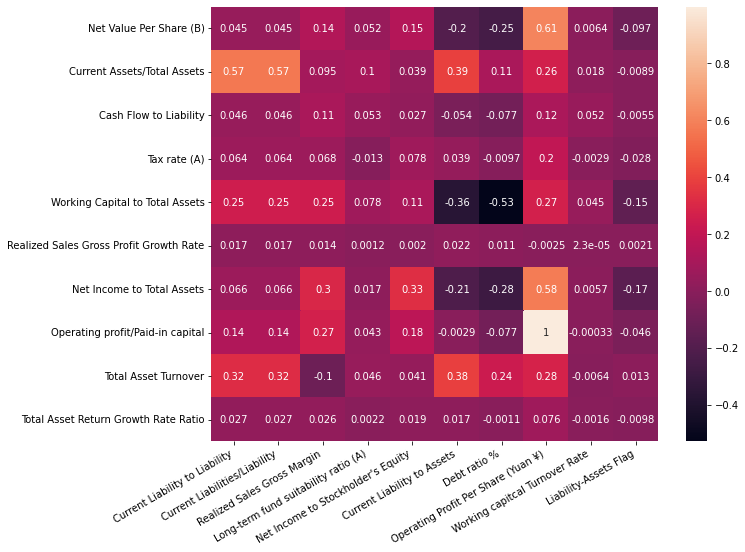

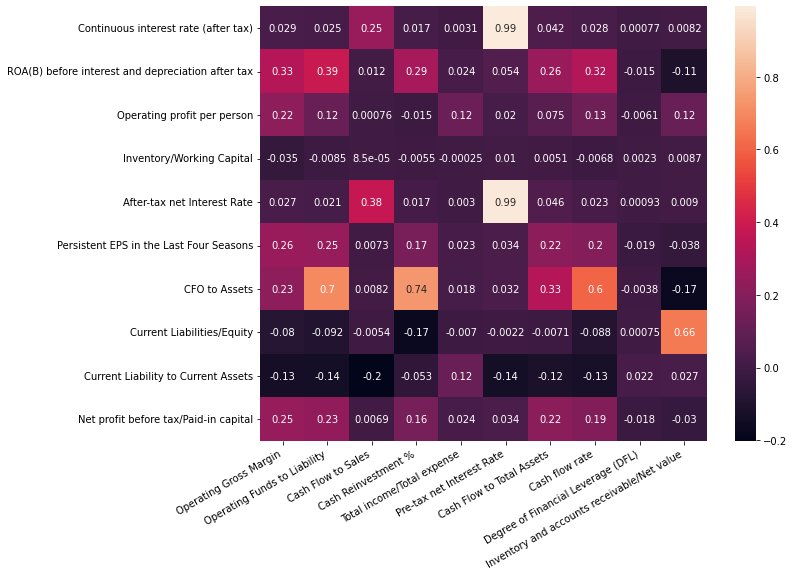

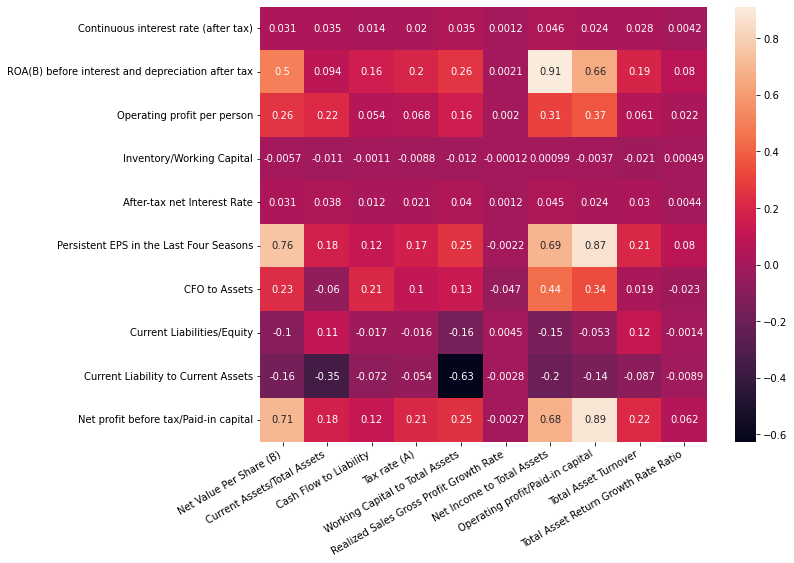

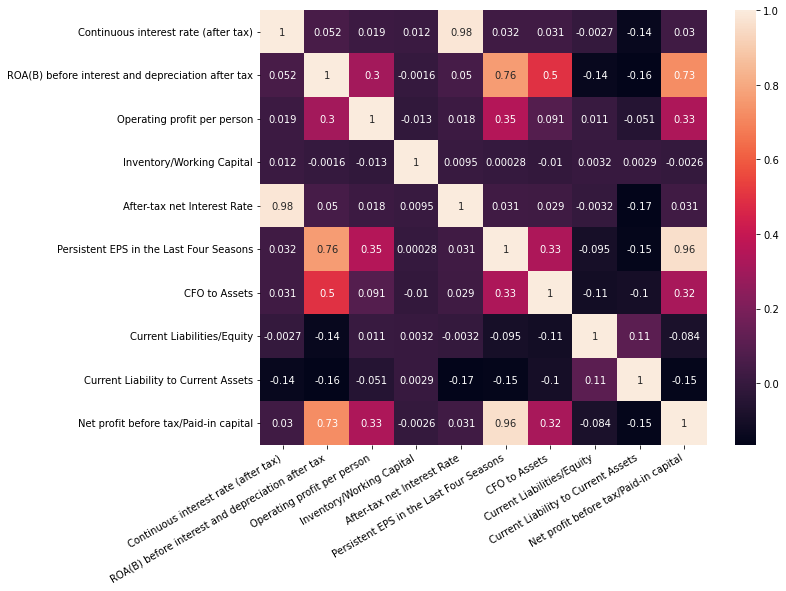

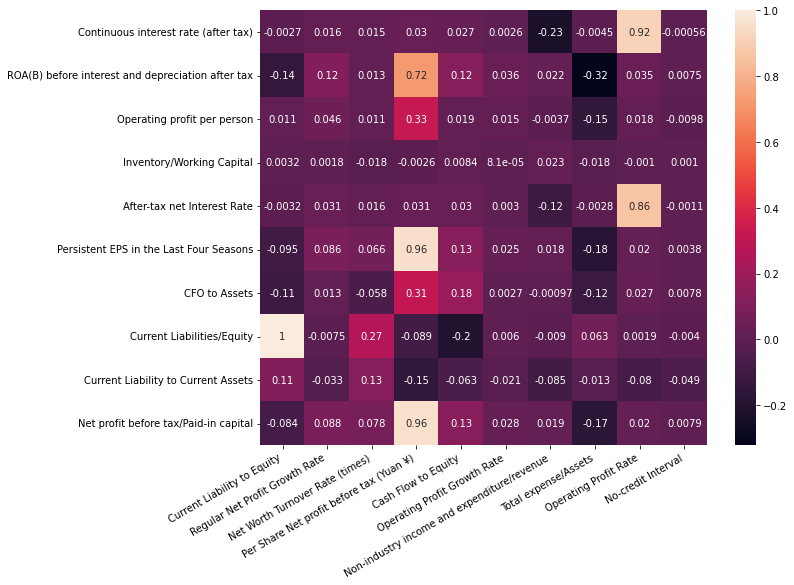

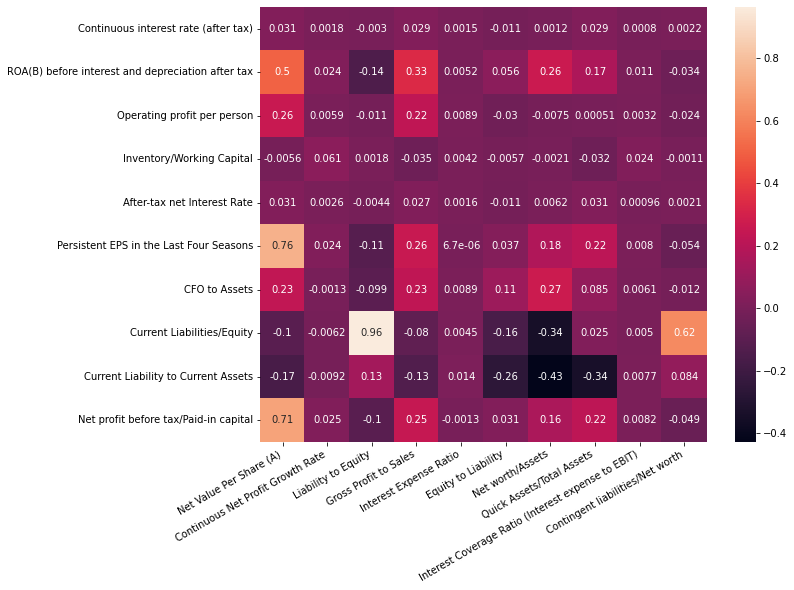

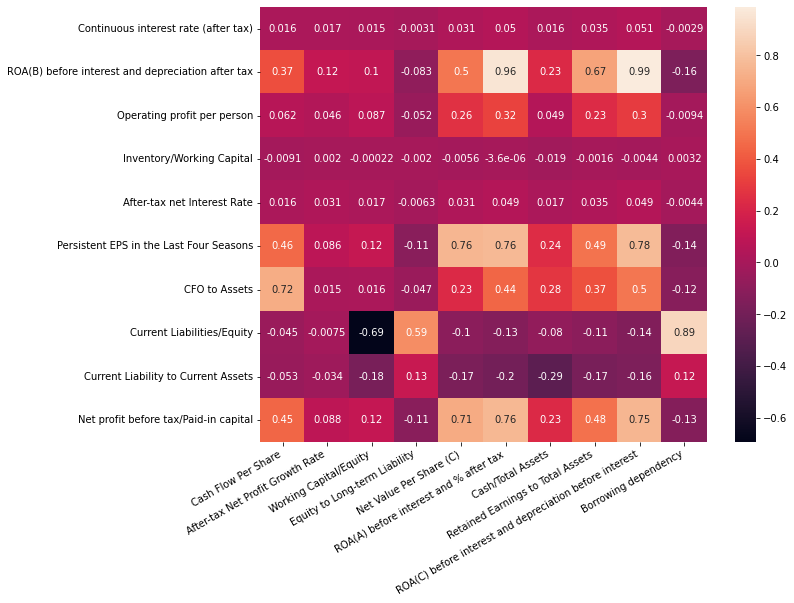

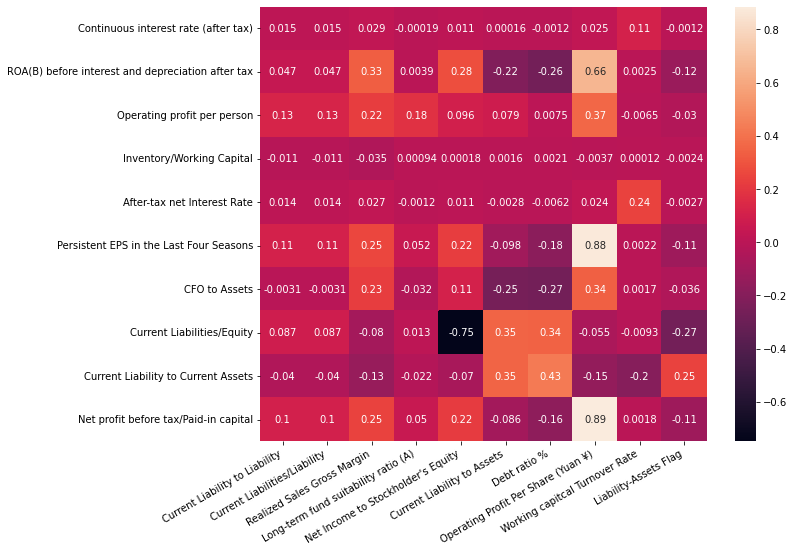

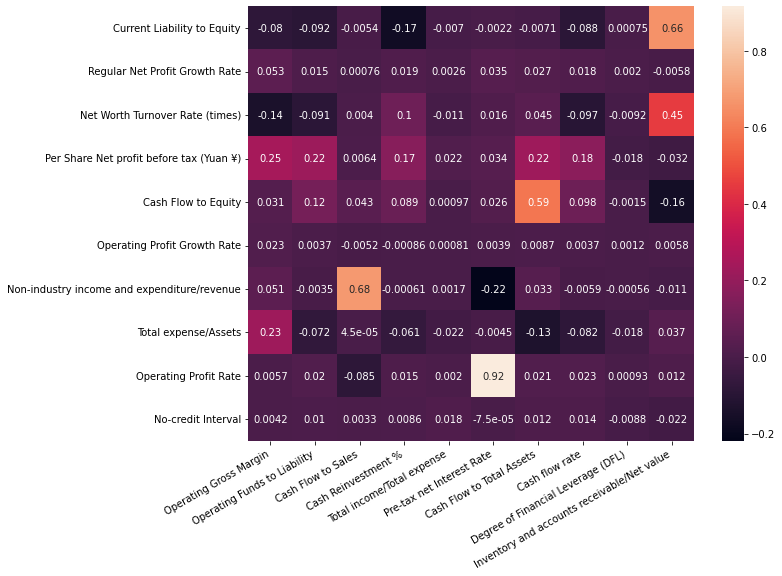

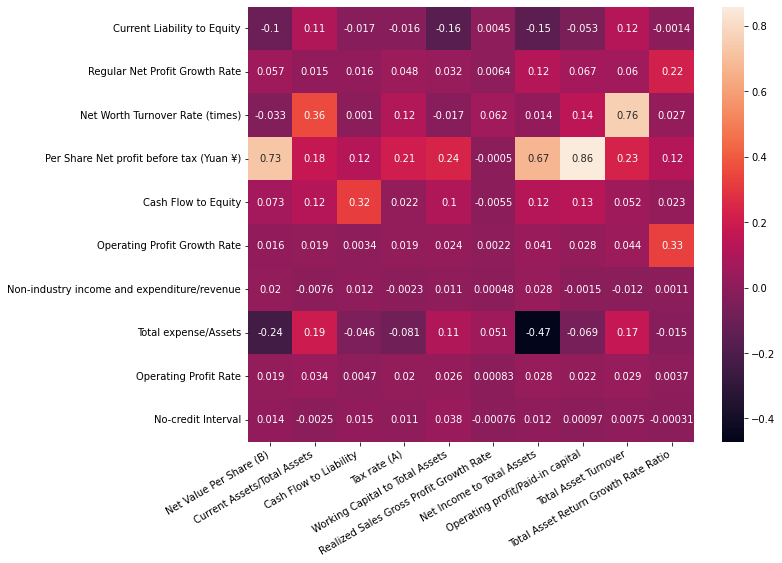

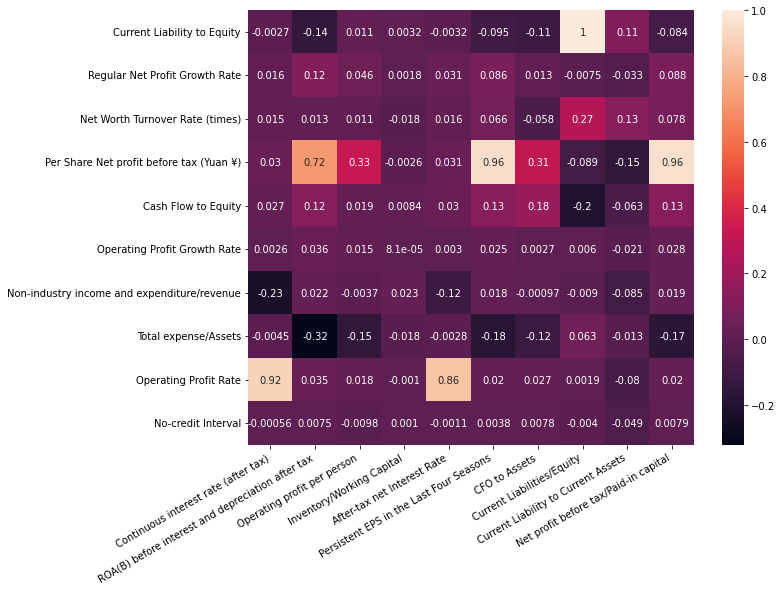

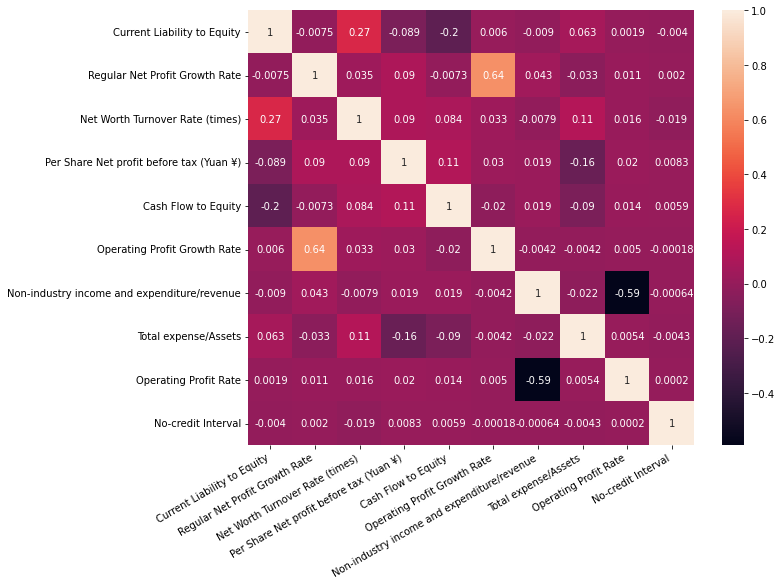

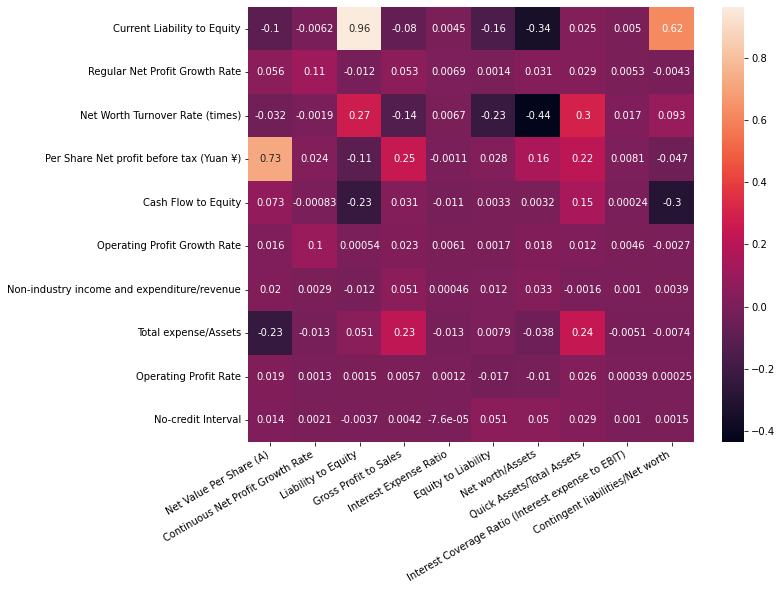

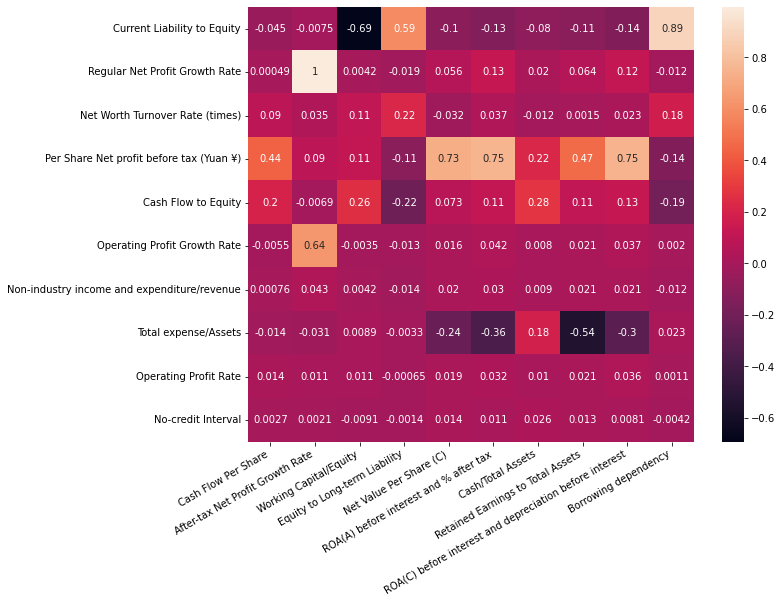

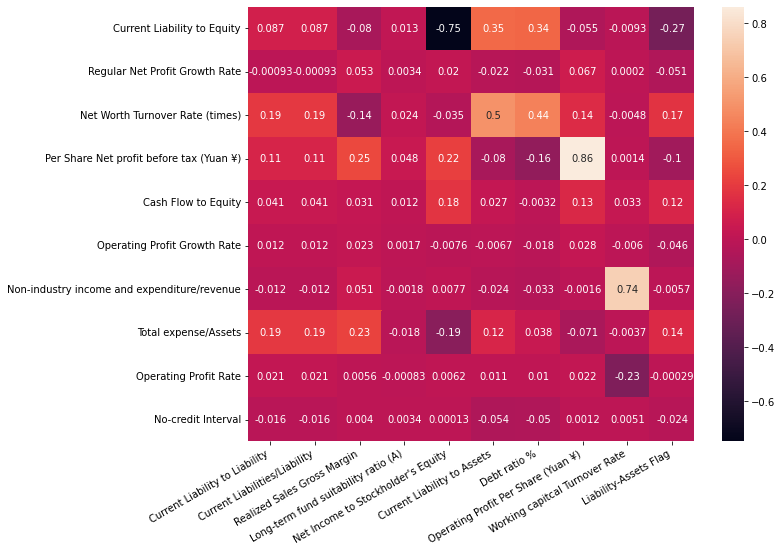

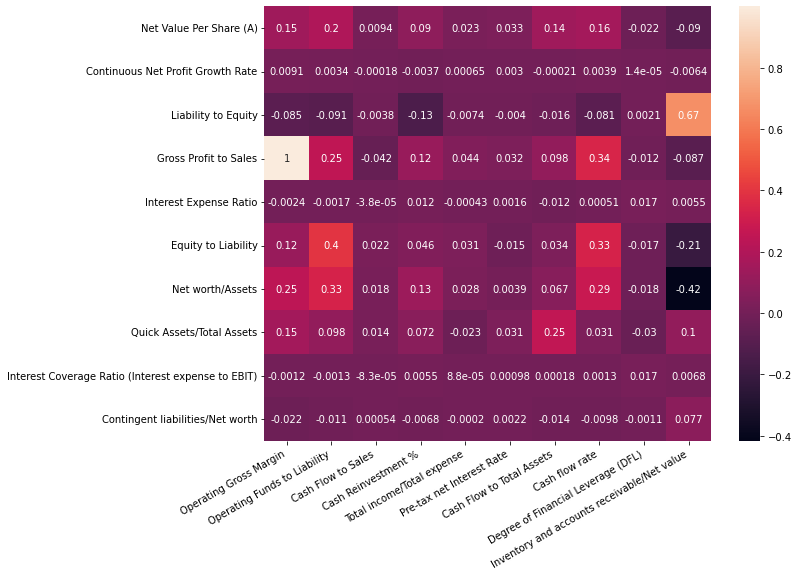

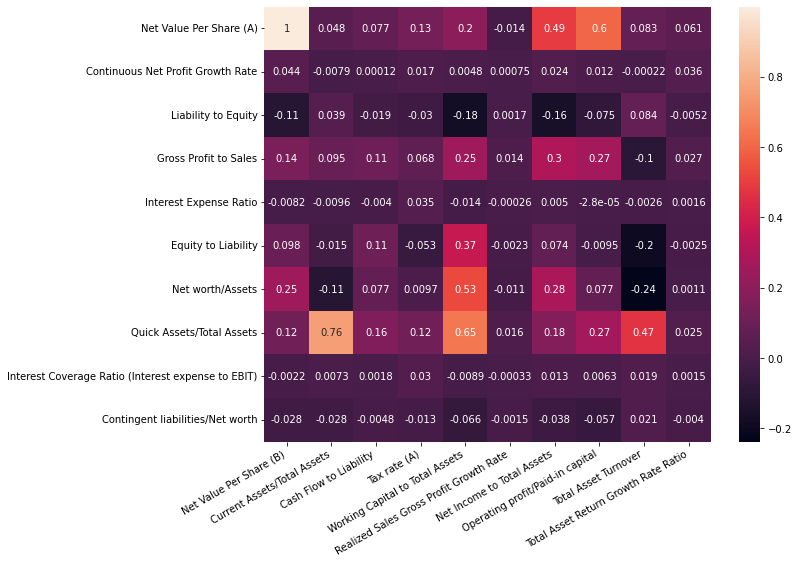

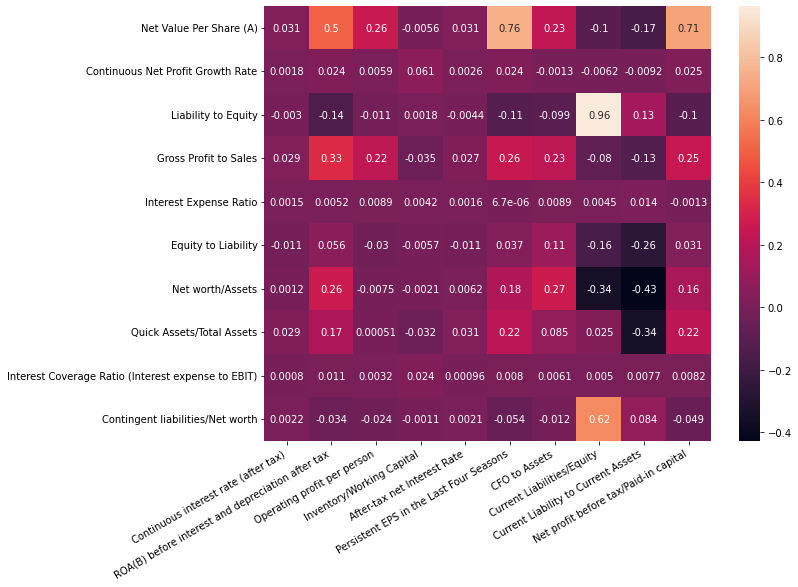

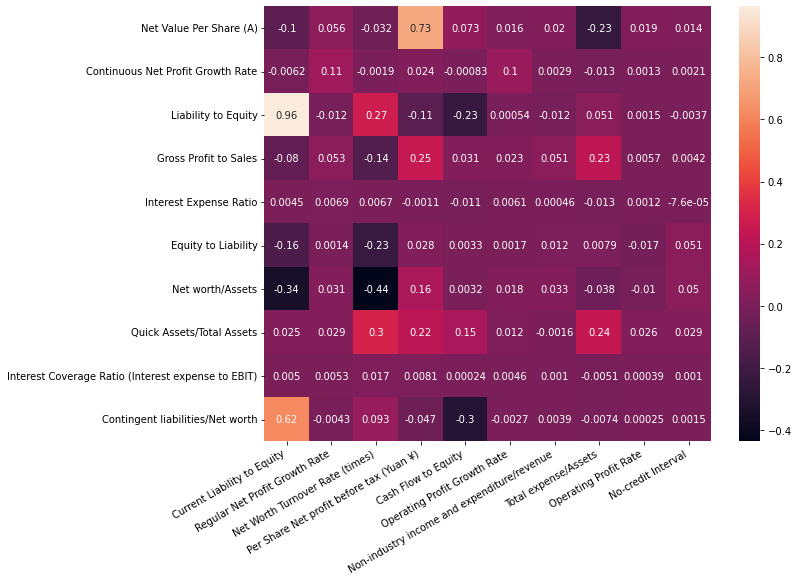

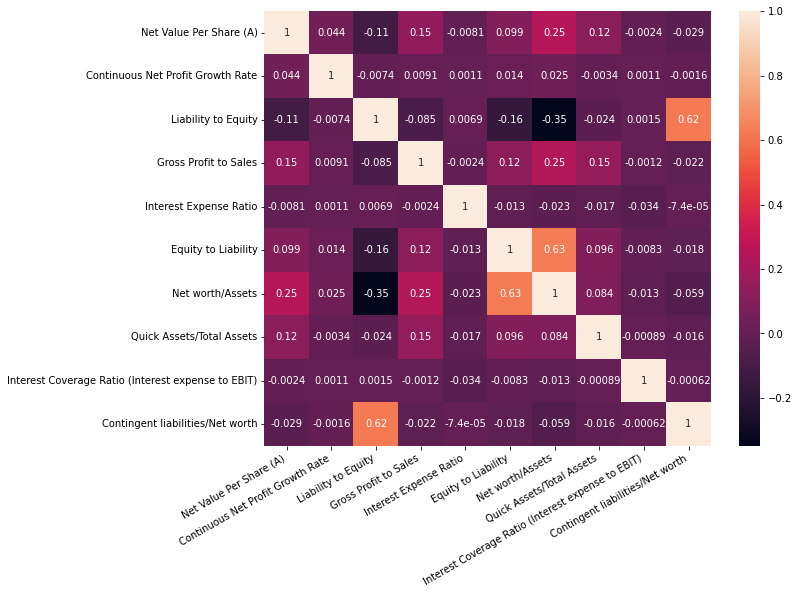

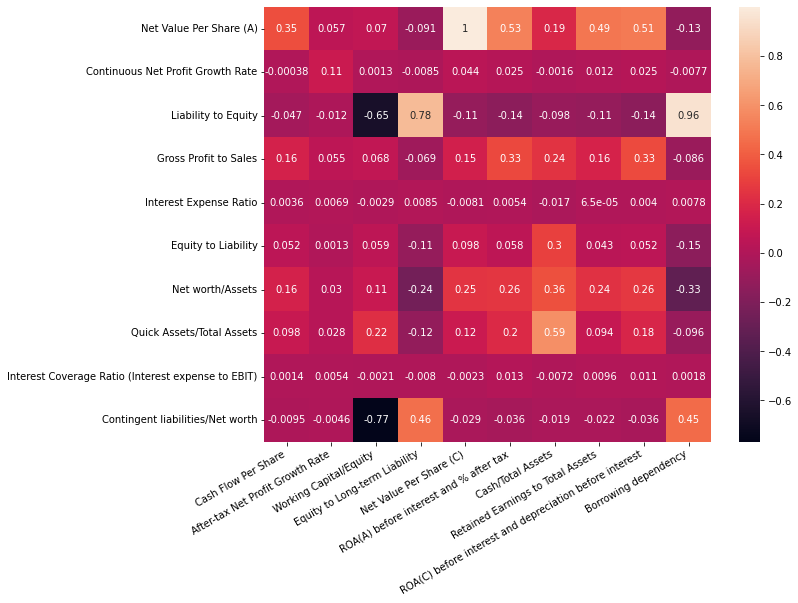

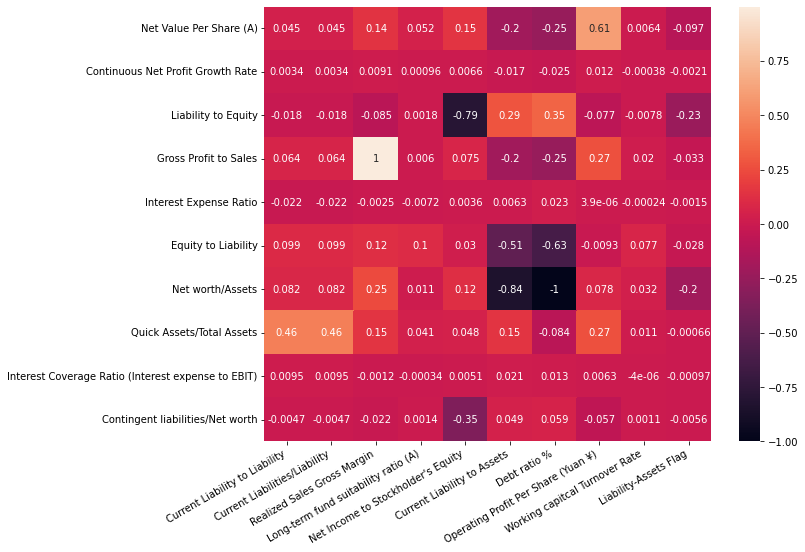

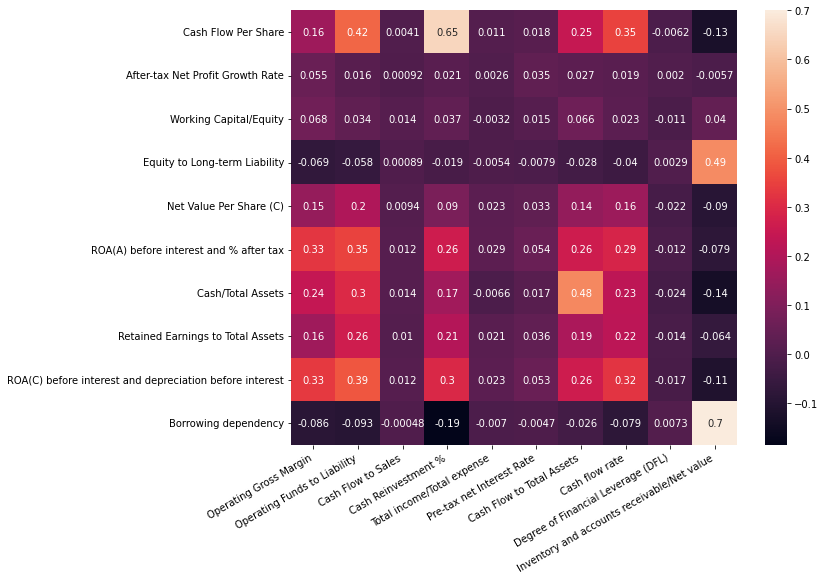

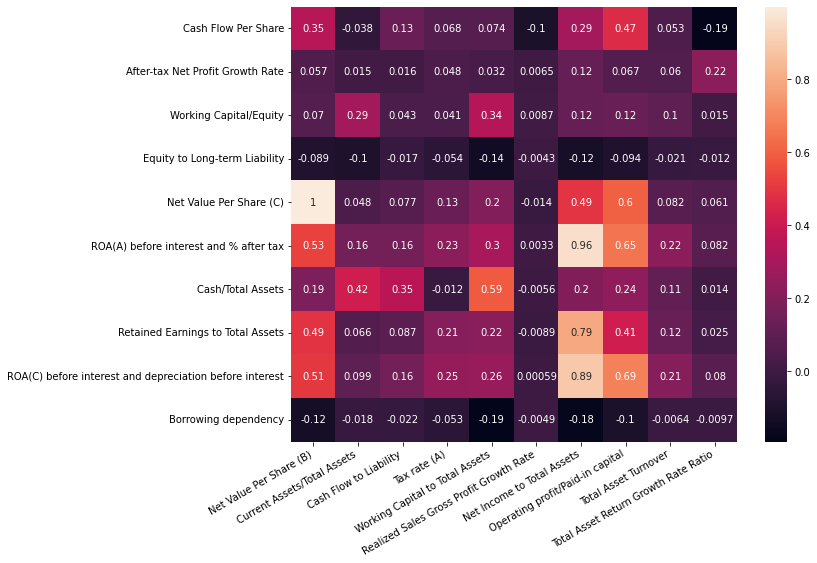

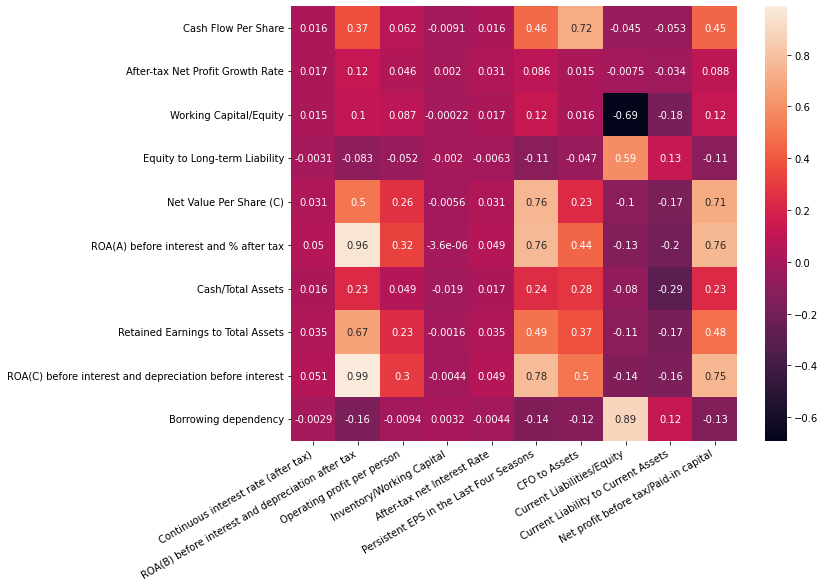

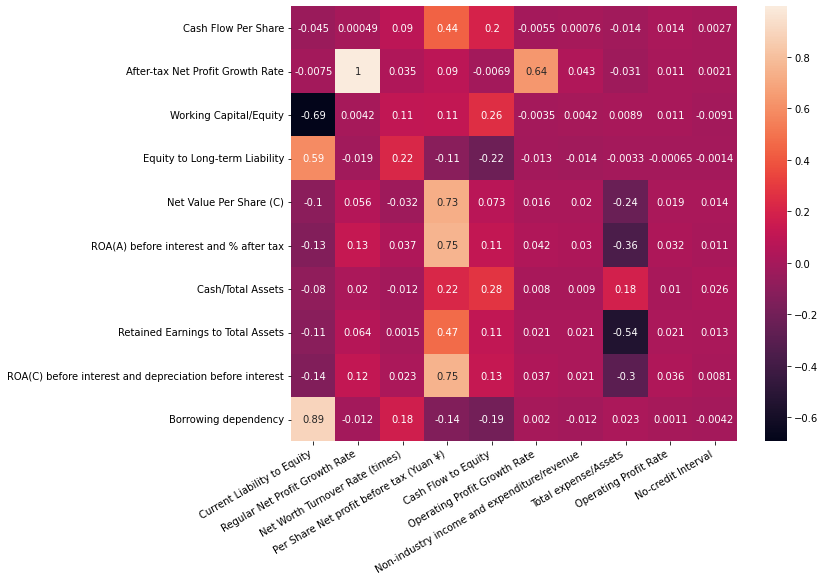

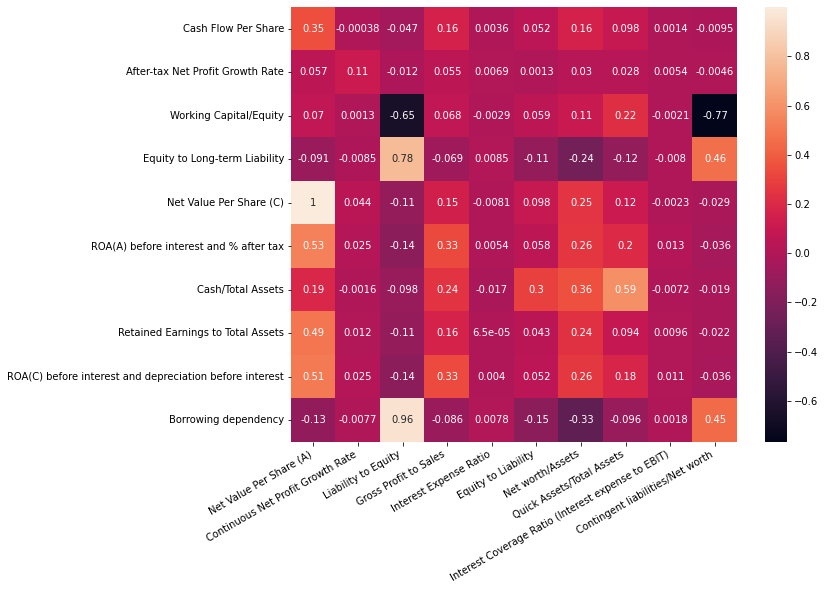

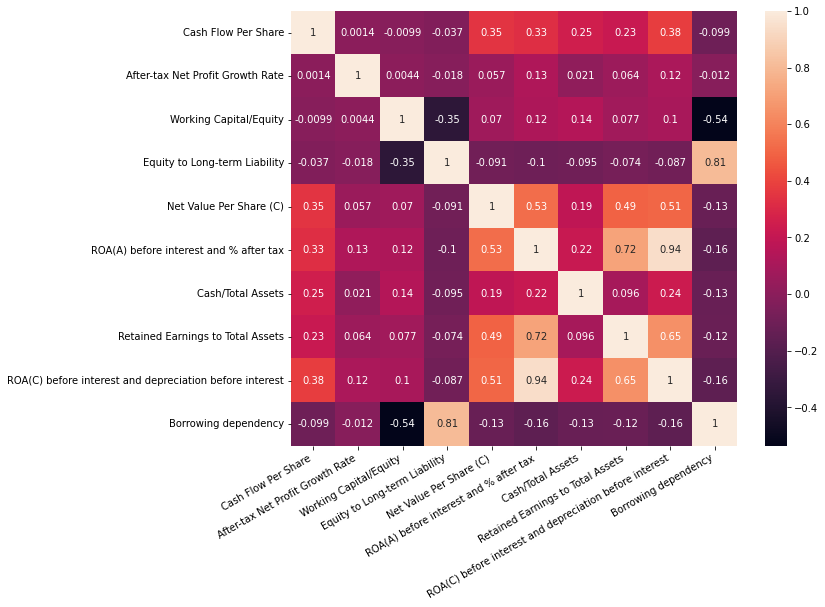

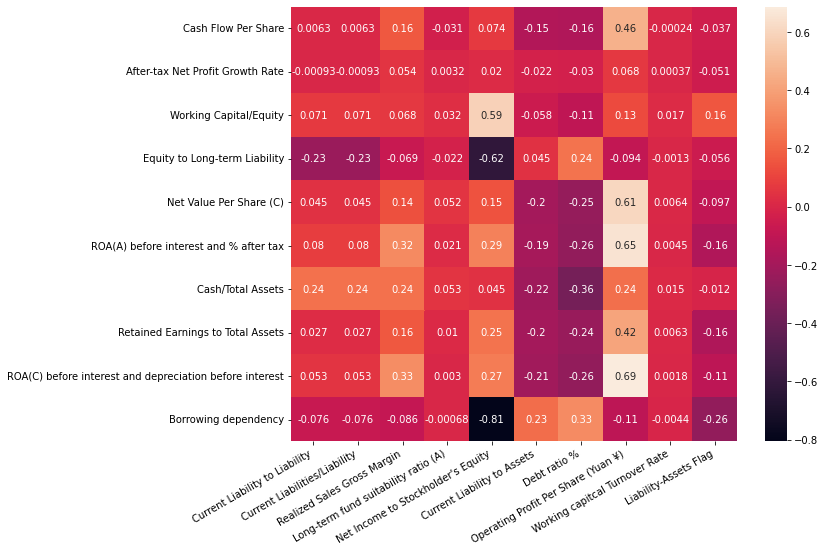

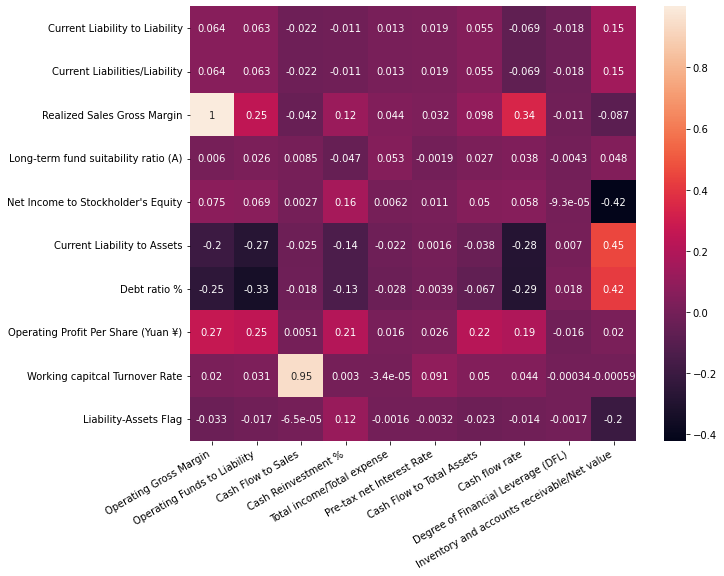

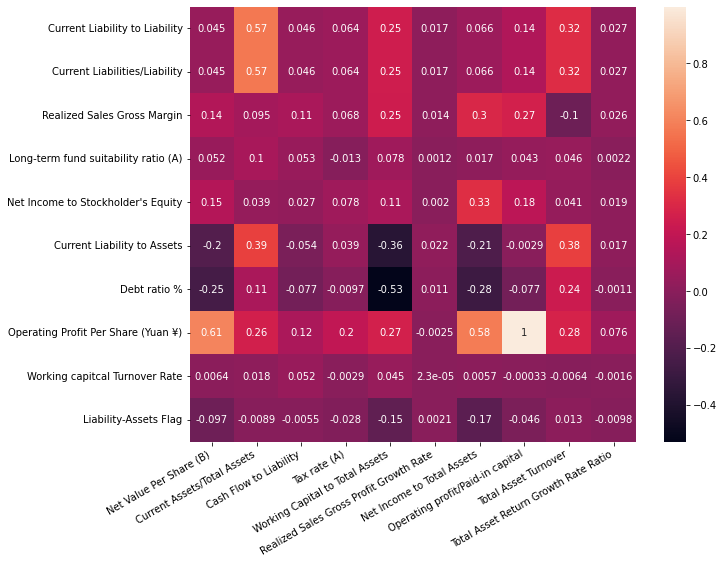

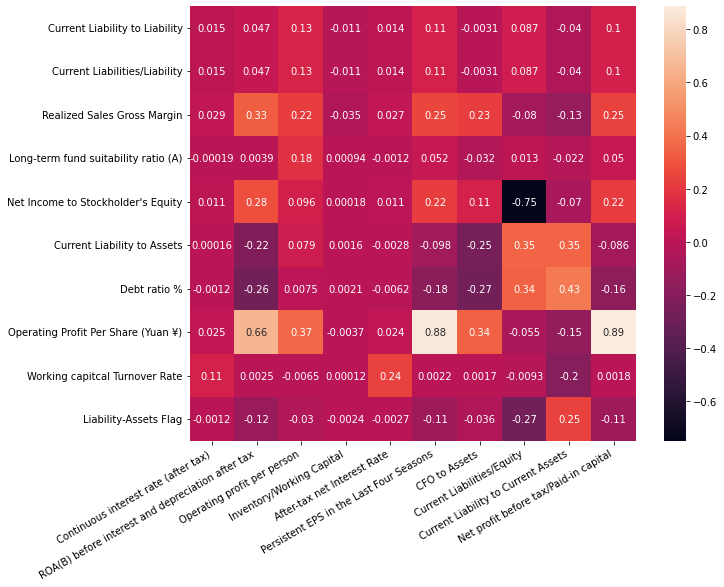

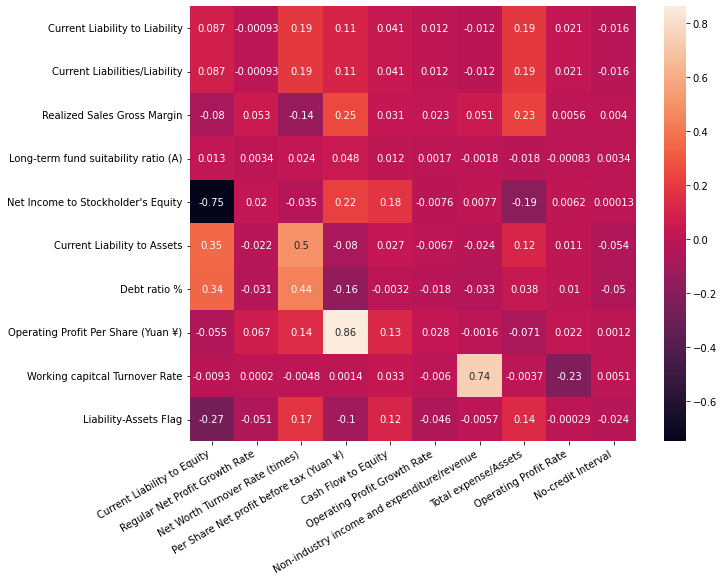

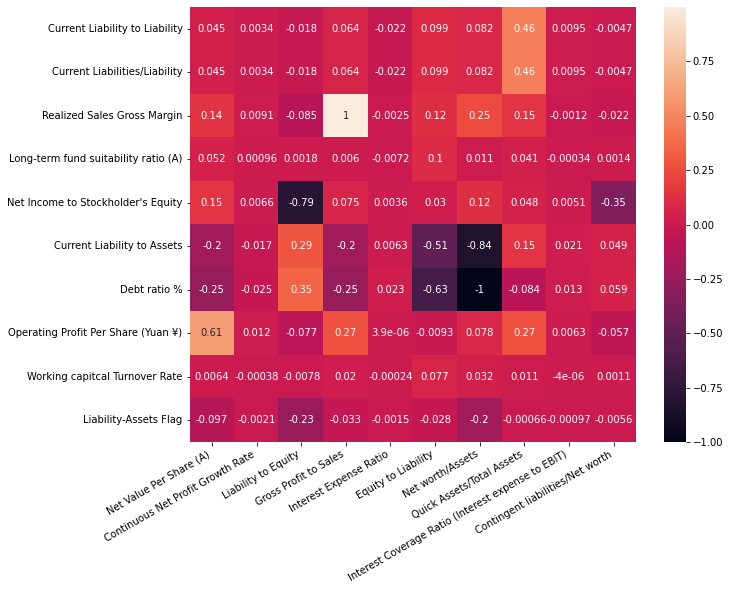

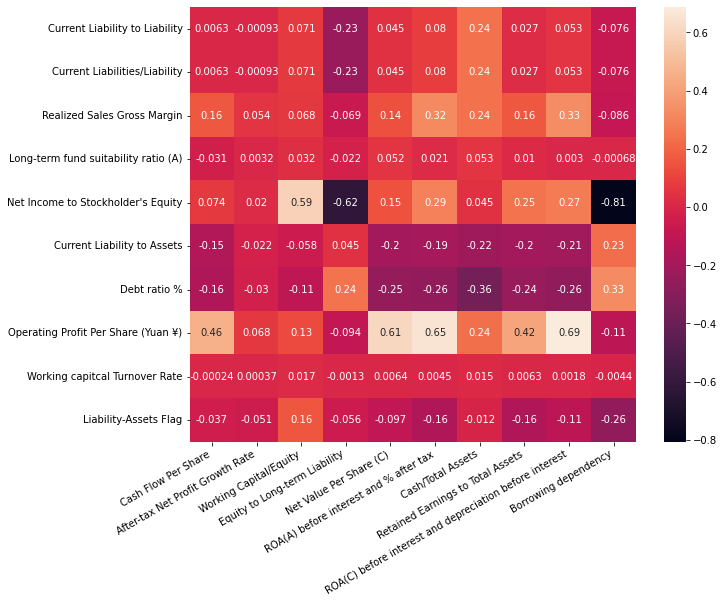

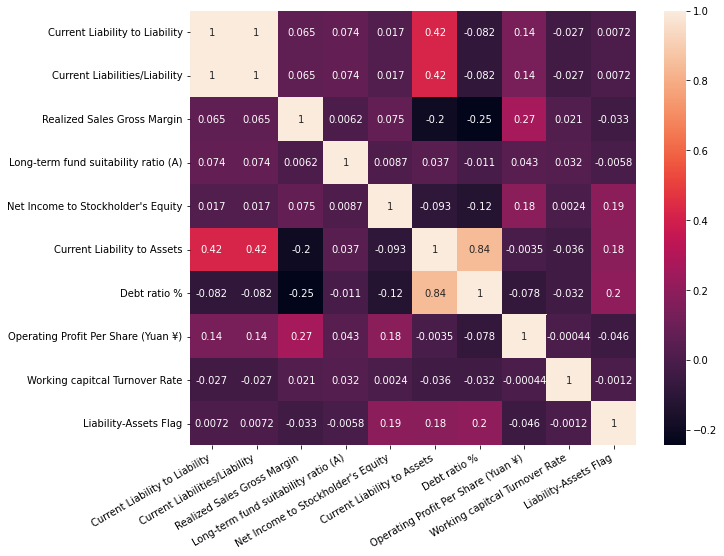

In [50]:
for i in range(0, 70, 10):
    for j in range(0, 70, 10):
        f, axes = plt.subplots(1, figsize=(10, 8))
        sn.heatmap(df_corr.iloc[i:i+10, j:j+10], annot=True)
        axes.tick_params(axis='x', rotation=30)
        plt.setp(axes.xaxis.get_majorticklabels(), ha='right')
        plt.show()

Finding all subsets of correlated attributes (one subset may consist of more than 2 elements).

Note: we set the threshold for 0.9 (if correlation > 0.9 we suppose the pair as correlated)

In [31]:
abs(df_corr) > 0.9

Current Assets/Total Assets  \
Current Assets/Total Assets                                                True   
No-credit Interval                                                        False   
CFO to Assets                                                             False   
Contingent liabilities/Net worth                                          False   
Interest Coverage Ratio (Interest expense to EBIT)                        False   
...                                                                         ...   
Operating Profit Rate                                                     False   
Current Liabilities/Liability                                             False   
Net Value Per Share (A)                                                   False   
Cash Flow to Total Assets                                                 False   
Continuous Net Profit Growth Rate                                         False   

                                                    No-credit Interval  \
Current Assets/Total Assets                                      False   
No-credit Interval                                                True   
CFO to Assets                                                    False   
Contingent liabilities/Net worth                                 False   
Interest Coverage Ratio (Interest expense to EBIT)               False   
...                                                                ...   
Operating Profit Rate                                            False   
Current Liabilities/Liability                                    False   
Net Value Per Share (A)                                          False   
Cash Flow to Total Assets                                        False   
Continuous Net Profit Growth Rate                                False   

                                                    CFO to Assets  \
Current Assets/Total Assets                                 False   
No-credit Interval                                          False   
CFO to Assets                                                True   
Contingent liabilities/Net worth                            False   
Interest Coverage Ratio (Interest expense to EBIT)          False   
...                                                           ...   
Operating Profit Rate                                       False   
Current Liabilities/Liability                               False   
Net Value Per Share (A)                                     False   
Cash Flow to Total Assets                                   False   
Continuous Net Profit Growth Rate                           False   

                                                    Contingent liabilities/Net worth  \
Current Assets/Total Assets                                                    False   
No-credit Interval                                                             False   
CFO to Assets                                                                  False   
Contingent liabilities/Net worth                                                True   
Interest Coverage Ratio (Interest expense to EBIT)                             False   
...                                                                              ...   
Operating Profit Rate                                                          False   
Current Liabilities/Liability                                                  False   
Net Value Per Share (A)                                                        False   
Cash Flow to Total Assets                                                      False   
Continuous Net Profit Growth Rate                                              False   

                                                    Interest Coverage Ratio (Interest expense to EBIT)  \
Current Assets/Total Assets                                                                     False    
No-credit Interval                                                  

In [32]:
cols = columns_without_bankrupt

In [34]:
print("Number of attributes: ", len(cols))

Number of attributes:  70


In [35]:
df_corr[cols[0]]

Current Assets/Total Assets                           1.000000
No-credit Interval                                   -0.002520
CFO to Assets                                        -0.059645
Contingent liabilities/Net worth                     -0.028117
Interest Coverage Ratio (Interest expense to EBIT)    0.007281
                                                        ...   
Operating Profit Rate                                 0.033821
Current Liabilities/Liability                         0.565640
Net Value Per Share (A)                               0.047816
Cash Flow to Total Assets                             0.202907
Continuous Net Profit Growth Rate                    -0.007937
Name: Current Assets/Total Assets, Length: 70, dtype: float64

## Finding the subsets of correlated attributes

In [36]:
# highly correlated pairs
corr_pairs = list()

In [37]:
# Double loop
for row_id, row in enumerate(cols):
    for col_id, row_col in enumerate(df_corr[row]):
        if row_id != col_id and abs(row_col) > 0.9:
            corr_pairs.append({cols[row_id], cols[col_id]})

In [38]:
print('Number of correlated pairs:', len(corr_pairs))

Number of correlated pairs: 56


In [39]:
corr_pairs[:10]

[{'Operating Profit Per Share (Yuan ¥)', 'Operating profit/Paid-in capital'},
 {'Debt ratio %', 'Net worth/Assets'},
 {'Net Value Per Share (B)', 'Net Value Per Share (C)'},
 {'Net Value Per Share (A)', 'Net Value Per Share (B)'},
 {'Current Liabilities/Equity', 'Current Liability to Equity'},
 {'Current Liability to Equity', 'Liability to Equity'},
 {'After-tax net Interest Rate', 'Pre-tax net Interest Rate'},
 {'After-tax net Interest Rate', 'Continuous interest rate (after tax)'},
 {'Current Liabilities/Liability', 'Current Liability to Liability'},
 {'Net profit before tax/Paid-in capital',
  'Per Share Net profit before tax (Yuan ¥)'}]

However, we see a lot of attributes repeating in different pairs.

So the one subset may consit of more than two correlated attributes. We handle it with the next triple loop.

In [42]:
# Triple loop
corr_sets = list()

In [43]:
for row_id, row in enumerate(cols):
    for col_id, row_col in enumerate(df_corr[row]):
        if row_id != col_id and abs(row_col) > 0.9:
            if corr_sets:
                for corr_set in corr_sets:
                    if cols[row_id] in corr_set:
                        corr_set.add(cols[col_id])
                        break
                else:
                    corr_sets.append({cols[row_id], cols[col_id]})
            else:
                corr_sets.append({cols[row_id], cols[col_id]})

In [47]:
print('Number of correlated sets: ', len(corr_sets))

Number of correlated sets:  12


In [48]:
for s in corr_sets:
    print(len(s), "\t", s)

2 	 {'Operating Profit Per Share (Yuan ¥)', 'Operating profit/Paid-in capital'}
2 	 {'Debt ratio %', 'Net worth/Assets'}
3 	 {'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)'}
4 	 {'Liability to Equity', 'Borrowing dependency', 'Current Liability to Equity', 'Current Liabilities/Equity'}
4 	 {'After-tax net Interest Rate', 'Operating Profit Rate', 'Pre-tax net Interest Rate', 'Continuous interest rate (after tax)'}
2 	 {'Current Liabilities/Liability', 'Current Liability to Liability'}
3 	 {'Per Share Net profit before tax (Yuan ¥)', 'Net profit before tax/Paid-in capital', 'Persistent EPS in the Last Four Seasons'}
4 	 {'ROA(C) before interest and depreciation before interest', 'ROA(B) before interest and depreciation after tax', 'Net Income to Total Assets', 'ROA(A) before interest and % after tax'}
2 	 {'Working capitcal Turnover Rate', 'Cash Flow to Sales'}
2 	 {'Regular Net Profit Growth Rate', 'After-tax Net Profit Growth Rate'}
2 	 {'Liability to E

## Remove correlating attributes

In [49]:
corr_lists = list(map(lambda cs: list(cs), corr_sets))

In [51]:
# The first attribute from each set will not be removed.
names_to_remove = list(map(lambda l: l[1:], corr_lists))
names_to_remove

[['Operating profit/Paid-in capital'],
 ['Net worth/Assets'],
 ['Net Value Per Share (A)', 'Net Value Per Share (C)'],
 ['Borrowing dependency',
  'Current Liability to Equity',
  'Current Liabilities/Equity'],
 ['Operating Profit Rate',
  'Pre-tax net Interest Rate',
  'Continuous interest rate (after tax)'],
 ['Current Liability to Liability'],
 ['Net profit before tax/Paid-in capital',
  'Persistent EPS in the Last Four Seasons'],
 ['ROA(B) before interest and depreciation after tax',
  'Net Income to Total Assets',
  'ROA(A) before interest and % after tax'],
 ['Cash Flow to Sales'],
 ['After-tax Net Profit Growth Rate'],
 ['Borrowing dependency'],
 ['Operating Gross Margin', 'Gross Profit to Sales']]

In [52]:
from functools import reduce

In [53]:
# Merge all sublists af attributes into one list.
names_to_remove = list(reduce(lambda l1, l2: l1 + l2, names_to_remove, []))

In [54]:
names_to_remove

['Operating profit/Paid-in capital',
 'Net worth/Assets',
 'Net Value Per Share (A)',
 'Net Value Per Share (C)',
 'Borrowing dependency',
 'Current Liability to Equity',
 'Current Liabilities/Equity',
 'Operating Profit Rate',
 'Pre-tax net Interest Rate',
 'Continuous interest rate (after tax)',
 'Current Liability to Liability',
 'Net profit before tax/Paid-in capital',
 'Persistent EPS in the Last Four Seasons',
 'ROA(B) before interest and depreciation after tax',
 'Net Income to Total Assets',
 'ROA(A) before interest and % after tax',
 'Cash Flow to Sales',
 'After-tax Net Profit Growth Rate',
 'Borrowing dependency',
 'Operating Gross Margin',
 'Gross Profit to Sales']

In [57]:
print("Number of columns to be removed:", len(names_to_remove))

Number of columns to be removed: 21


In [58]:
new_column_set = set(columns_without_bankrupt).difference(set(names_to_remove))

In [59]:
print("Number of columns left: ", len(new_column_set))

Number of columns left:  50


In [60]:
# final data
data = df_clean[new_column_set].copy()
data['Bankrupt?'] = list(df_clean['Bankrupt?'])

In [61]:
data

Inventory/Working Capital  Current Assets/Total Assets  \
0                      0.276920                     0.190643   
1                      0.289642                     0.182419   
2                      0.277456                     0.602806   
3                      0.276580                     0.225815   
4                      0.287913                     0.358380   
...                         ...                          ...   
6814                   0.277543                     0.578455   
6815                   0.277368                     0.444043   
6816                   0.277022                     0.496053   
6817                   0.277353                     0.564439   
6818                   0.276975                     0.505010   

      No-credit Interval  CFO to Assets  Contingent liabilities/Net worth  \
0               0.622879       0.520382                          0.006479   
1               0.623652       0.567101                          0.005835   
2               0.623841       0.538491                          0.006562   
3               0.622929       0.604105                          0.005366   
4               0.623521       0.578469                          0.006624   
...                  ...            ...                               ...   
6814            0.623620       0.587178                          0.005366   
6815            0.623931       0.569498                          0.008619   
6816            0.624156       0.589341                          0.005366   
6817            0.623957       0.678338                          0.007068   
6818            0.626680       0.505531                          0.006368   

      Total income/Total expense  \
0                       0.002022   
1                       0.002226   
2                       0.002060   
3                       0.001831   
4                       0.002224   
...                          ...   
6814                    0.002266   
6815                    0.002288   
6816                    0.002239   
6817                    0.002395   
6818                    0.002791   

      Interest Coverage Ratio (Interest expense to EBIT)  \
0                                              0.564050    
1                                              0.570175    
2                                              0.563706    
3                                              0.564663    
4                                              0.575617    
...                                                 ...    
6814                                           0.566193    
6815                                           0.566018    
6816                                           0.565158    
6817                                           0.565302    
6818                                           0.565167    

      Per Share Net profit before tax (Yuan ¥)  \
0                                     0.138736   
1                                     0.169918   
2                                     0.142803   
3                                     0.148603   
4                                     0.168412   
...                                        ...   
6814                                  0.172102   
6815                                  0.172780   
6816                                  0.173232   
6817                                  0.185584   
6818                                  0.182119   

      Operating Profit Per Share (Yuan ¥)  Equity to Long-term Liability  ...  \
0                                0.095921                       0.126549  ...   
1                                0.093722                       0.120916  ...   
2                                0.092338                       0.117922  ...   
3                                0.077762                       0.120760  ...   
4                                0.096898                       0.110933  ...   
...                                   ...                            ..

Let's look once again at correlation matrix to be sure that we only have 1's on diagonal and no -1's values.

<AxesSubplot:>

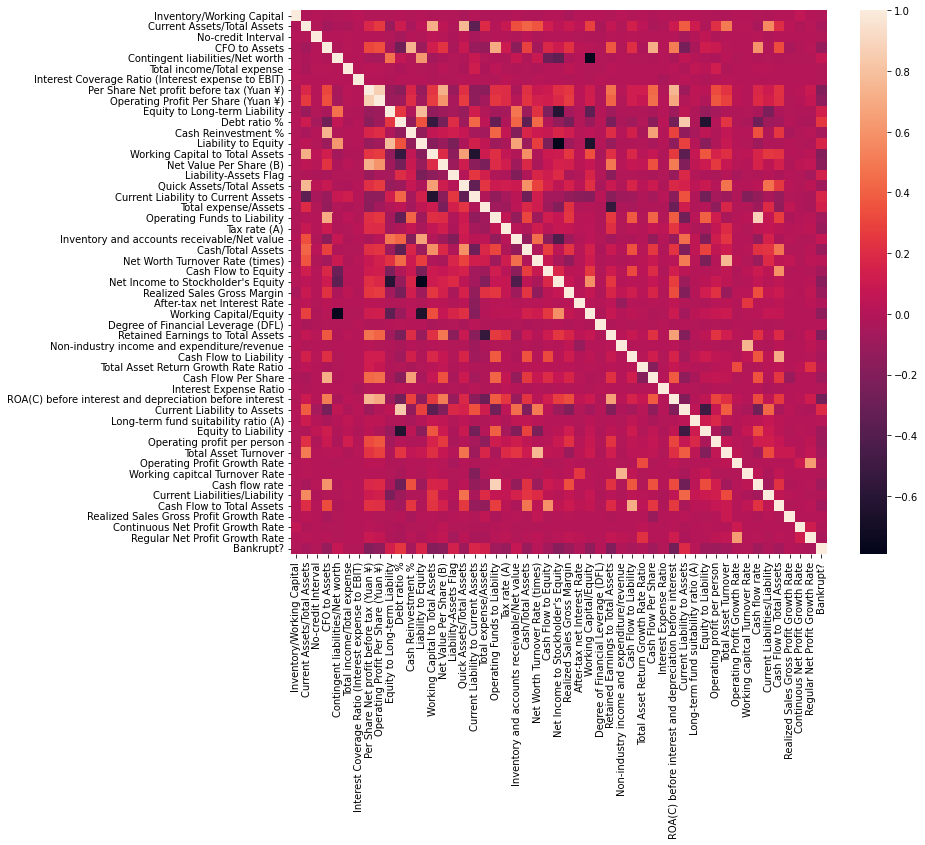

In [62]:
df_corr = data.corr()
f, axes = plt.subplots(1, figsize=(12,10))
sn.heatmap(df_corr)

# 2. Balancing data with oversampling

In [190]:
def add_value_label(x_list,y_list):
    for i in range(len(x_list)):
        plt.text(i, y_list[i], y_list[i], size=16)

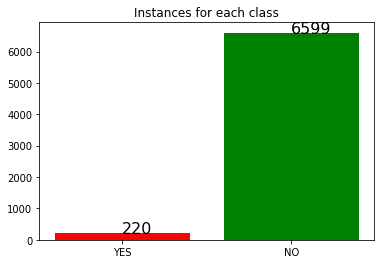

In [191]:
num_yes = len(data[data['Bankrupt?'] == 1])
num_no = len(data[data['Bankrupt?'] == 0])

plt.bar(['YES', 'NO'], [num_yes, num_no], color=['red', 'green'])
plt.title("Instances for each class")
add_value_label(['YES', 'NO'], [num_yes, num_no])

# Comment

We see higly unbalanced dataset with class proportion of 1 to 30. That's why we are going to use oversampling techniques to artificially add more instances of lower numbered class.

It is also important to use oversampling to generate only training data. The test set shouldn't contain any artificial instances  because we have no evidency that they may be representative. 

Below is the schema for this approach (we want to use oversampling for only blue areas).

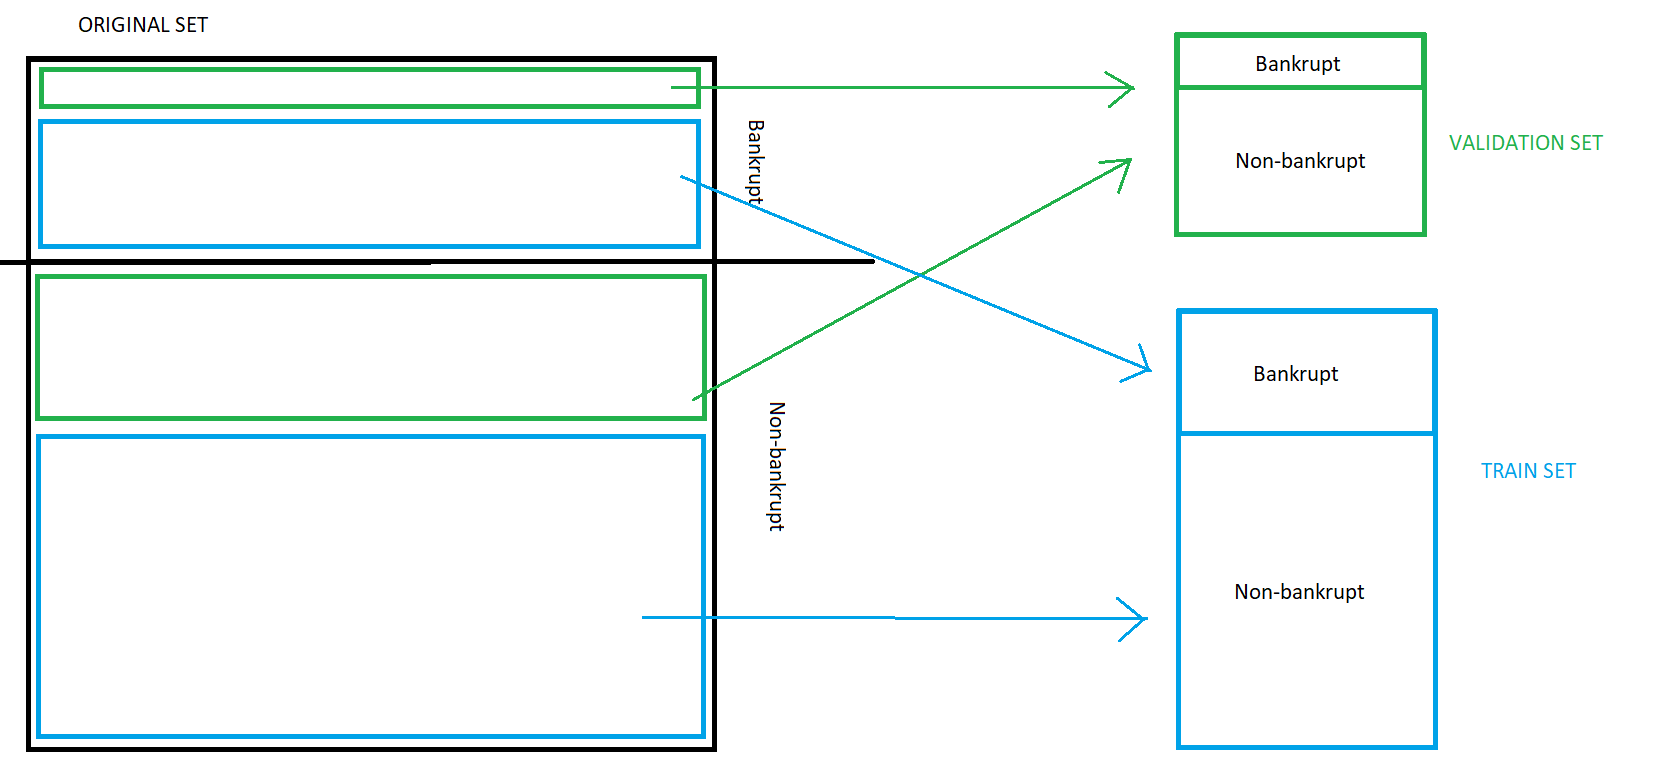

In [63]:
X = data.iloc[:,:-1].to_numpy()
Y = data.iloc[:,-1].to_numpy().reshape(len(data))

In [87]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
from collections import Counter

### Split data

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3) 
p = np.unique(Y_test, return_counts=True)[1]
print(f"\tValidation set (green area)\n\nbankrupt instances: {p[1]},\nnon-bankrupt instances: {p[0]}")

	Validation set (green area)

bankrupt instances: 77,
non-bankrupt instances: 1969


In [72]:
X_train

array([[0.27734101, 0.33418755, 0.62375227, ..., 0.02223422, 0.21741533,
        0.68785096],
       [0.27736594, 0.58992972, 0.62386684, ..., 0.02208104, 0.21764256,
        0.6897122 ],
       [0.27718155, 0.67993845, 0.62387726, ..., 0.02211291, 0.2175675 ,
        0.68918046],
       ...,
       [0.27856436, 0.65905903, 0.6211485 , ..., 0.02365758, 0.217635  ,
        0.68976544],
       [0.27772578, 0.82728264, 0.62263198, ..., 0.03398482, 0.22921733,
        0.79047134],
       [0.27704376, 0.38181165, 0.62401959, ..., 0.02233122, 0.2176395 ,
        0.68971567]])

## Oversampling techniques

### ROSE

In [73]:
rose = RandomOverSampler(random_state=31)
X_rose, Y_rose = rose.fit_resample(X_train, Y_train)
print(Counter(Y_rose))

Counter({0: 4630, 1: 4630})


#### SMOTE

In [74]:
sm = SMOTE(random_state=42)
X_sm, Y_sm = sm.fit_resample(X_train, Y_train)
print(Counter(Y_sm))

Counter({0: 4630, 1: 4630})


## Training

We are going to comapre three algorithms (Random Forest, SVM and Neural Network) with the following metrics:
* precision
* recall
* f1-score

beeing sure that bankrupt is out True class.

There is no point on using accuracy, because of high imbalance of data.

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [157]:
f1 = {}
precision = {}
recall = {}

### * Random Forest

In [158]:
print("\t\tRANDOM FOREST FOR ROSE")

rf_rose = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=6, random_state=35)
rf_rose.fit(X_rose, Y_rose)

y_pred = rf_rose.predict(X_test)

# Save metrics
f1['Random Forest ROSE'] = f1_score(Y_test, y_pred)
precision['Random Forest ROSE'] = precision_score(Y_test, y_pred)
recall['Random Forest ROSE'] = recall_score(Y_test, y_pred)

# Show confusion matrix and metrics
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

		RANDOM FOREST FOR ROSE
------------------------------------------------------------
CONFUSION MATRIX:
 [[1847  122]
 [  17   60]] 

------------------------------------------------------------
OTHER METRICS:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      1969
           1       0.33      0.78      0.46        77

    accuracy                           0.93      2046
   macro avg       0.66      0.86      0.71      2046
weighted avg       0.97      0.93      0.94      2046



In [159]:
print("\t\tRANDOM FOREST FOR SMOTE")

rf_smote = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=6, random_state=35)
rf_smote.fit(X_sm, Y_sm)

y_pred = rf_smote.predict(X_test)

# Save metrics
f1['Random Forest SMOTE'] = f1_score(Y_test, y_pred)
precision['Random Forest SMOTE'] = precision_score(Y_test, y_pred)
recall['Random Forest SMOTE'] = recall_score(Y_test, y_pred)

# Show confusion matrix and metrics
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

		RANDOM FOREST FOR SMOTE
------------------------------------------------------------
CONFUSION MATRIX:
 [[1786  183]
 [  17   60]] 

------------------------------------------------------------
OTHER METRICS:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      1969
           1       0.25      0.78      0.38        77

    accuracy                           0.90      2046
   macro avg       0.62      0.84      0.66      2046
weighted avg       0.96      0.90      0.93      2046



### * SVM

In [160]:
kernel_functions = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

In [161]:
print("\t\tSVM FOR ROSE")
clf_rose = svm.SVC(kernel=kernel_functions[0]) # Linear Kernel
clf_rose.fit(X_rose, Y_rose)

y_pred = clf_rose.predict(X_test)

# Save metrics
f1['SVM ROSE'] = f1_score(Y_test, y_pred)
precision['SVM ROSE'] = precision_score(Y_test, y_pred)
recall['SVM ROSE'] = recall_score(Y_test, y_pred)

# Show confusion matrix and metrics
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

		SVM FOR ROSE
------------------------------------------------------------
CONFUSION MATRIX:
 [[1704  265]
 [  13   64]] 

------------------------------------------------------------
OTHER METRICS:
               precision    recall  f1-score   support

           0       0.99      0.87      0.92      1969
           1       0.19      0.83      0.32        77

    accuracy                           0.86      2046
   macro avg       0.59      0.85      0.62      2046
weighted avg       0.96      0.86      0.90      2046



In [178]:
print("\t\tSVM FOR SMOTE")
clf_smote = svm.SVC(kernel=kernel_functions[0]) # Linear Kernel
clf_smote.fit(X_sm, Y_sm)

y_pred = clf_smote.predict(X_test)

# Save metrics
f1['SVM SMOTE'] = f1_score(Y_test, y_pred)
precision['SVM SMOTE'] = precision_score(Y_test, y_pred)
recall['SVM SMOTE'] = recall_score(Y_test, y_pred)

# Show confusion matrix and metrics
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

		SVM FOR SMOTE
------------------------------------------------------------
CONFUSION MATRIX:
 [[1696  273]
 [  12   65]] 

------------------------------------------------------------
OTHER METRICS:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      1969
           1       0.19      0.84      0.31        77

    accuracy                           0.86      2046
   macro avg       0.59      0.85      0.62      2046
weighted avg       0.96      0.86      0.90      2046



### * Neural Network

In [163]:
import tensorflow as tf
from keras import backend as K
from tensorflow.keras import regularizers

In [164]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [165]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=0.00001)
    
# model
model_rose = tf.keras.Sequential()
model_rose.add(tf.keras.layers.Dense(16, input_shape=(50,), activity_regularizer=regularizers.L2(0.0001), activation='relu'))
model_rose.add(tf.keras.layers.Dropout(0.2))

model_rose.add(tf.keras.layers.Dense(32, activity_regularizer=regularizers.L2(0.0001), activation='relu'))
model_rose.add(tf.keras.layers.Dropout(0.4))

model_rose.add(tf.keras.layers.Dense(32, activity_regularizer=regularizers.L2(0.0001), activation='relu'))
model_rose.add(tf.keras.layers.Dropout(0.4))

model_rose.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_rose.summary()

model_rose.compile(loss='binary_crossentropy', optimizer=opt, metrics=[f1_m])

history_rose = model_rose.fit(X_rose, Y_rose, 
                    validation_data=(X_test, Y_test),
                    batch_size=128,
                    epochs=100)


print("\n\n\t\tNeural Network for ROSE")

y_pred = model_rose.predict(X_test)
y_pred = y_pred.round().astype('int64')

# Save metrics
f1['Neural Network ROSE'] = f1_score(Y_test, y_pred)
precision['Neural Network ROSE'] = precision_score(Y_test, y_pred)
recall['Neural Network ROSE'] = recall_score(Y_test, y_pred)

# Show confusion matrix and metrics
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 16)                816       
_________________________________________________________________
dropout_24 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_25 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_26 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                

73/73 [==============================] - 0s 2ms/step - loss: 0.4044 - f1_m: 0.8460 - val_loss: 0.3387 - val_f1_m: 0.3309
Epoch 53/100
73/73 [==============================] - 0s 2ms/step - loss: 0.4015 - f1_m: 0.8439 - val_loss: 0.3231 - val_f1_m: 0.3368
Epoch 54/100
73/73 [==============================] - 0s 2ms/step - loss: 0.4021 - f1_m: 0.8443 - val_loss: 0.3622 - val_f1_m: 0.3032
Epoch 55/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3957 - f1_m: 0.8445 - val_loss: 0.3308 - val_f1_m: 0.3354
Epoch 56/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3940 - f1_m: 0.8451 - val_loss: 0.3399 - val_f1_m: 0.3292
Epoch 57/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3927 - f1_m: 0.8438 - val_loss: 0.3303 - val_f1_m: 0.3338
Epoch 58/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3906 - f1_m: 0.8457 - val_loss: 0.3078 - val_f1_m: 0.3483
Epoch 59/100
73/73 [==============================] - 0s 2ms/step - loss: 0

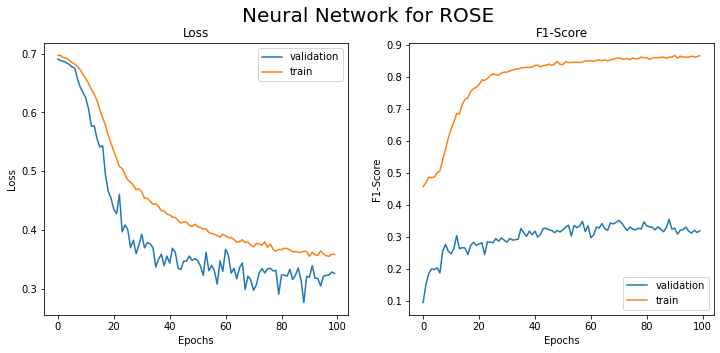

In [166]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(history_rose.history['val_loss'])
ax[0].plot(history_rose.history['loss'])
ax[0].legend(['validation', 'train'])
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(history_rose.history['val_f1_m'])
ax[1].plot(history_rose.history['f1_m'])
ax[1].legend(['validation', 'train'])
ax[1].set_title("F1-Score")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("F1-Score")

fig.suptitle('Neural Network for ROSE', fontsize=20)
plt.show()

In [167]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=0.00001)
    
# model
model_smote = tf.keras.Sequential()
model_smote.add(tf.keras.layers.Dense(16, input_shape=(50,), activity_regularizer=regularizers.L2(0.0001), activation='relu'))
model_smote.add(tf.keras.layers.Dropout(0.2))

model_smote.add(tf.keras.layers.Dense(32, activity_regularizer=regularizers.L2(0.0001), activation='relu'))
model_smote.add(tf.keras.layers.Dropout(0.4))

model_smote.add(tf.keras.layers.Dense(32, activity_regularizer=regularizers.L2(0.0001), activation='relu'))
model_smote.add(tf.keras.layers.Dropout(0.4))

model_smote.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_smote.summary()

model_smote.compile(loss='binary_crossentropy', optimizer=opt, metrics=[f1_m])

history_smote = model_smote.fit(X_rose, Y_rose, 
                    validation_data=(X_test, Y_test),
                    batch_size=128,
                    epochs=100)


print("\n\n\t\tNeural Network for SMOTE")

y_pred = model_smote.predict(X_test)
y_pred = y_pred.round().astype('int64')

# Save metrics
f1['Neural Network SMOTE'] = f1_score(Y_test, y_pred)
precision['Neural Network SMOTE'] = precision_score(Y_test, y_pred)
recall['Neural Network SMOTE'] = recall_score(Y_test, y_pred)

# Show confusion matrix and metrics
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                816       
_________________________________________________________________
dropout_27 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_28 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_29 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                

73/73 [==============================] - 0s 2ms/step - loss: 0.4193 - f1_m: 0.8363 - val_loss: 0.3508 - val_f1_m: 0.3200
Epoch 53/100
73/73 [==============================] - 0s 2ms/step - loss: 0.4172 - f1_m: 0.8345 - val_loss: 0.3557 - val_f1_m: 0.3190
Epoch 54/100
73/73 [==============================] - 0s 2ms/step - loss: 0.4140 - f1_m: 0.8403 - val_loss: 0.3359 - val_f1_m: 0.3263
Epoch 55/100
73/73 [==============================] - 0s 2ms/step - loss: 0.4174 - f1_m: 0.8383 - val_loss: 0.3694 - val_f1_m: 0.3060
Epoch 56/100
73/73 [==============================] - 0s 2ms/step - loss: 0.4128 - f1_m: 0.8421 - val_loss: 0.3459 - val_f1_m: 0.3197
Epoch 57/100
73/73 [==============================] - 0s 2ms/step - loss: 0.4161 - f1_m: 0.8384 - val_loss: 0.3665 - val_f1_m: 0.3103
Epoch 58/100
73/73 [==============================] - 0s 2ms/step - loss: 0.4134 - f1_m: 0.8399 - val_loss: 0.3332 - val_f1_m: 0.3277
Epoch 59/100
73/73 [==============================] - 0s 2ms/step - loss: 0

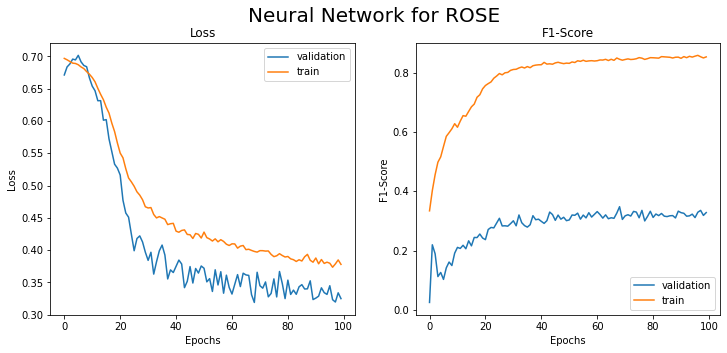

In [168]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(history_smote.history['val_loss'])
ax[0].plot(history_smote.history['loss'])
ax[0].legend(['validation', 'train'])
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(history_smote.history['val_f1_m'])
ax[1].plot(history_smote.history['f1_m'])
ax[1].legend(['validation', 'train'])
ax[1].set_title("F1-Score")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("F1-Score")

fig.suptitle('Neural Network for ROSE', fontsize=20)
plt.show()

# 3. Weights

Beside of oversampling techniques the defining of custom weights can be used as well. These weights are to be apply on a loss function depending on the predictive class.

In this case we don't need to generate any artificial data, so we are good stay with initial dataset.

In [169]:
cl_weights = {0: 1, 1: 10}

In this way we get the algorithm 10 times more penalty if it wrongly classified the lower-numbered-class instance.

### * Random Forest

In [170]:
print("\t\tRANDOM FOREST WITH CUSTOM WEIGHTS")

rf_weights = RandomForestClassifier(n_estimators=500, criterion='entropy', class_weight=cl_weights, max_depth=6, random_state=35)
rf_weights.fit(X_train, Y_train)

y_pred = rf_weights.predict(X_test)

# Save metrics
f1['Random Forest weights'] = f1_score(Y_test, y_pred)
precision['Random Forest weights'] = precision_score(Y_test, y_pred)
recall['Random Forest weights'] = recall_score(Y_test, y_pred)

# Show confusion matrix and metrics
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

		RANDOM FOREST WITH CUSTOM WEIGHTS
------------------------------------------------------------
CONFUSION MATRIX:
 [[1932   37]
 [  33   44]] 

------------------------------------------------------------
OTHER METRICS:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1969
           1       0.54      0.57      0.56        77

    accuracy                           0.97      2046
   macro avg       0.76      0.78      0.77      2046
weighted avg       0.97      0.97      0.97      2046



### * SVM

In [171]:
print("\t\tSVM FOR CUSTOM WEIGHTS")

cl_weights = {0: 1, 1: 6}
clf_weights = svm.SVC(kernel=kernel_functions[0], class_weight=cl_weights) # Linear Kernel
clf_weights.fit(X_train, Y_train)

y_pred = clf_weights.predict(X_test)

# Save metrics
f1['SVM weights'] = f1_score(Y_test, y_pred)
precision['SVM weights'] = precision_score(Y_test, y_pred)
recall['SVM weights'] = recall_score(Y_test, y_pred)

# Show confusion matrix and metrics
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

		SVM FOR CUSTOM WEIGHTS
------------------------------------------------------------
CONFUSION MATRIX:
 [[1923   46]
 [  41   36]] 

------------------------------------------------------------
OTHER METRICS:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1969
           1       0.44      0.47      0.45        77

    accuracy                           0.96      2046
   macro avg       0.71      0.72      0.72      2046
weighted avg       0.96      0.96      0.96      2046



### * Neural Network

In [172]:
cl_weights = {0: 1, 1: 20}

opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=0.00001)
    
# model
model_weights = tf.keras.Sequential()
model_weights.add(tf.keras.layers.Dense(16, input_shape=(50,), activity_regularizer=regularizers.L2(0.0001), activation='relu'))
model_weights.add(tf.keras.layers.Dropout(0.2))

model_weights.add(tf.keras.layers.Dense(32, activity_regularizer=regularizers.L2(0.0001), activation='relu'))
model_weights.add(tf.keras.layers.Dropout(0.4))

model_weights.add(tf.keras.layers.Dense(32, activity_regularizer=regularizers.L2(0.0001), activation='relu'))
model_weights.add(tf.keras.layers.Dropout(0.4))


model_weights.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_weights.summary()

model_weights.compile(loss='binary_crossentropy', optimizer=opt, metrics=[f1_m])

history_weights = model_weights.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test),
                    batch_size=128,
                    epochs=250,
                    class_weight=cl_weights)


print("\n\n\t\tNeural Network for Custom Weights")

y_pred = model_weights.predict(X_test)
y_pred = y_pred.round().astype('int64')

# Save metrics
f1['Neural Network weights'] = f1_score(Y_test, y_pred)
precision['Neural Network weights'] = precision_score(Y_test, y_pred)
recall['Neural Network weights'] = recall_score(Y_test, y_pred)

# Show confusion matrix and metrics
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 16)                816       
_________________________________________________________________
dropout_30 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_31 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_32 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)               

Epoch 52/250
38/38 [==============================] - 0s 2ms/step - loss: 0.9542 - f1_m: 0.1263 - val_loss: 0.4537 - val_f1_m: 0.2574
Epoch 53/250
38/38 [==============================] - 0s 2ms/step - loss: 0.9487 - f1_m: 0.1338 - val_loss: 0.4416 - val_f1_m: 0.2501
Epoch 54/250
38/38 [==============================] - 0s 2ms/step - loss: 0.9460 - f1_m: 0.1411 - val_loss: 0.4409 - val_f1_m: 0.2859
Epoch 55/250
38/38 [==============================] - 0s 2ms/step - loss: 0.9572 - f1_m: 0.1730 - val_loss: 0.4432 - val_f1_m: 0.3619
Epoch 56/250
38/38 [==============================] - 0s 2ms/step - loss: 0.9353 - f1_m: 0.1569 - val_loss: 0.4371 - val_f1_m: 0.3638
Epoch 57/250
38/38 [==============================] - 0s 3ms/step - loss: 0.9171 - f1_m: 0.2001 - val_loss: 0.4354 - val_f1_m: 0.3723
Epoch 58/250
38/38 [==============================] - 0s 2ms/step - loss: 0.9368 - f1_m: 0.1347 - val_loss: 0.4259 - val_f1_m: 0.3646
Epoch 59/250
38/38 [==============================] - 0s 2ms/s

38/38 [==============================] - 0s 2ms/step - loss: 0.7264 - f1_m: 0.2448 - val_loss: 0.3197 - val_f1_m: 0.3385
Epoch 114/250
38/38 [==============================] - 0s 2ms/step - loss: 0.7175 - f1_m: 0.2309 - val_loss: 0.3065 - val_f1_m: 0.3630
Epoch 115/250
38/38 [==============================] - 0s 2ms/step - loss: 0.7446 - f1_m: 0.2201 - val_loss: 0.3215 - val_f1_m: 0.3324
Epoch 116/250
38/38 [==============================] - 0s 2ms/step - loss: 0.7274 - f1_m: 0.2291 - val_loss: 0.3245 - val_f1_m: 0.3259
Epoch 117/250
38/38 [==============================] - 0s 2ms/step - loss: 0.7278 - f1_m: 0.2027 - val_loss: 0.3188 - val_f1_m: 0.3320
Epoch 118/250
38/38 [==============================] - 0s 2ms/step - loss: 0.7485 - f1_m: 0.2386 - val_loss: 0.3292 - val_f1_m: 0.3148
Epoch 119/250
38/38 [==============================] - 0s 2ms/step - loss: 0.7212 - f1_m: 0.2307 - val_loss: 0.2985 - val_f1_m: 0.3643
Epoch 120/250
38/38 [==============================] - 0s 2ms/step - 

Epoch 174/250
38/38 [==============================] - 0s 2ms/step - loss: 0.6776 - f1_m: 0.2548 - val_loss: 0.2887 - val_f1_m: 0.3441
Epoch 175/250
38/38 [==============================] - 0s 2ms/step - loss: 0.6562 - f1_m: 0.2452 - val_loss: 0.2957 - val_f1_m: 0.3324
Epoch 176/250
38/38 [==============================] - 0s 2ms/step - loss: 0.6460 - f1_m: 0.2515 - val_loss: 0.3016 - val_f1_m: 0.3322
Epoch 177/250
38/38 [==============================] - 0s 2ms/step - loss: 0.6570 - f1_m: 0.2422 - val_loss: 0.2869 - val_f1_m: 0.3435
Epoch 178/250
38/38 [==============================] - 0s 2ms/step - loss: 0.6428 - f1_m: 0.2433 - val_loss: 0.2882 - val_f1_m: 0.3379
Epoch 179/250
38/38 [==============================] - 0s 2ms/step - loss: 0.6324 - f1_m: 0.2626 - val_loss: 0.2955 - val_f1_m: 0.3271
Epoch 180/250
38/38 [==============================] - 0s 2ms/step - loss: 0.6770 - f1_m: 0.2308 - val_loss: 0.2947 - val_f1_m: 0.3311
Epoch 181/250
38/38 [==============================] - 

Epoch 235/250
38/38 [==============================] - 0s 2ms/step - loss: 0.6171 - f1_m: 0.2511 - val_loss: 0.2713 - val_f1_m: 0.3662
Epoch 236/250
38/38 [==============================] - 0s 2ms/step - loss: 0.6440 - f1_m: 0.2490 - val_loss: 0.2866 - val_f1_m: 0.3562
Epoch 237/250
38/38 [==============================] - 0s 2ms/step - loss: 0.6205 - f1_m: 0.2760 - val_loss: 0.2833 - val_f1_m: 0.3611
Epoch 238/250
38/38 [==============================] - 0s 2ms/step - loss: 0.6240 - f1_m: 0.2549 - val_loss: 0.2788 - val_f1_m: 0.3657
Epoch 239/250
38/38 [==============================] - 0s 2ms/step - loss: 0.5968 - f1_m: 0.2680 - val_loss: 0.2692 - val_f1_m: 0.3713
Epoch 240/250
38/38 [==============================] - 0s 2ms/step - loss: 0.5948 - f1_m: 0.2477 - val_loss: 0.2914 - val_f1_m: 0.3487
Epoch 241/250
38/38 [==============================] - 0s 2ms/step - loss: 0.6583 - f1_m: 0.2468 - val_loss: 0.2854 - val_f1_m: 0.3566
Epoch 242/250
38/38 [==============================] - 

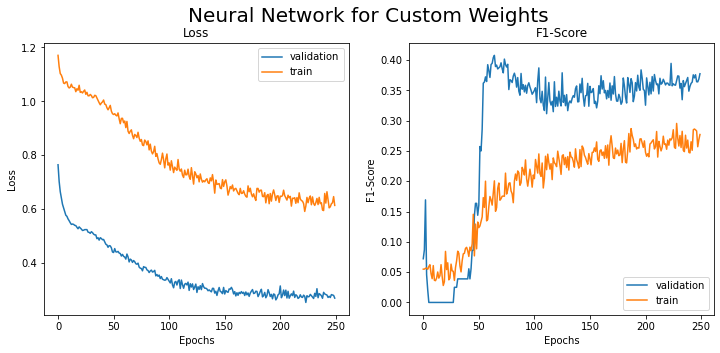

In [173]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(history_weights.history['val_loss'])
ax[0].plot(history_weights.history['loss'])
ax[0].legend(['validation', 'train'])
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(history_weights.history['val_f1_m'])
ax[1].plot(history_weights.history['f1_m'])
ax[1].legend(['validation', 'train'])
ax[1].set_title("F1-Score")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("F1-Score")

fig.suptitle('Neural Network for Custom Weights', fontsize=20)
plt.show()

# Compare Performance of Algorithms

In [179]:
f1_ = pd.DataFrame.from_dict(f1, orient='index', columns=['f1-score'])
precision_ = pd.DataFrame.from_dict(precision, orient='index', columns=['precision'])
recall_ = pd.DataFrame.from_dict(recall, orient='index', columns=['recall'])

In [180]:
metrics_df = pd.concat([f1_, precision_, recall_], axis=1).sort_values('f1-score')

In [181]:
metrics_df

f1-score  precision    recall
SVM SMOTE               0.313253   0.192308  0.844156
SVM ROSE                0.315271   0.194529  0.831169
Neural Network ROSE     0.316785   0.193642  0.870130
Neural Network SMOTE    0.329298   0.202381  0.883117
Random Forest SMOTE     0.375000   0.246914  0.779221
Neural Network weights  0.379822   0.246154  0.831169
SVM weights             0.452830   0.439024  0.467532
Random Forest ROSE      0.463320   0.329670  0.779221
Random Forest weights   0.556962   0.543210  0.571429

<AxesSubplot:>

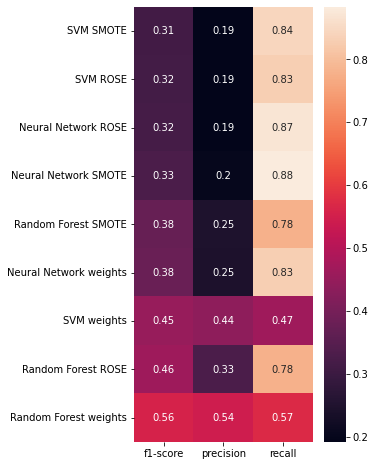

In [182]:
f, axes = plt.subplots(1, figsize=(4,8))
sn.heatmap(metrics_df, annot=True)

# Summary

1. The approach of defining weights for loss function is supposed to be most successful in terms of building classifiers for such kind of dataset (tabular and highly unbalanced).


2. Oversampling techniques (ROSE and SMOTE) are not doing well with SVM and Neral Network, whereas showing greater performace with Random Forest.


3. Random Forest certainly outperforms SVM and Neural Network for SMOTE, ROSE and weights.


4. Higher recall and lower precision for every setup suggests that algorithms face greater challenge with false predictions of bankruptcy rather than predict all the bankruptcy.